# Analysis of dynamic network ABM
Standard networks, no SDA yet

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from mesa.batchrunner import BatchRunner

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_80629/4112914030.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#from model import ConsumatModel
from model_no_homophily_dynamic_newdata import ConsumatModel

In [3]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})


## Network topology

### Watts-Strogatz Network
- **Type:** Small-world network
- **Known For:** High clustering coefficient and short average path lengths, which mimic many real-world social networks.
- **Formation:** Starts with a ring of `n` nodes each connected to `k` nearest neighbors. Rewires each edge with probability `p` to a randomly chosen node.
- **Key Parameters:**
  - `n`: Number of nodes
  - `k`: Number of nearest neighbors in the initial ring topology
  - `p`: Probability of rewiring each edge

### Barabasi-Albert Network
- **Type:** Scale-free network
- **Known For:** Its degree distribution follows a power law, which is typical for many large networks such as the internet, citation networks, and some social networks.
- **Formation:** Begins with a small number of nodes and adds new nodes one at a time. Each new node is connected to `k` existing nodes with a probability that depends on the number of links that the existing nodes already have.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `m`: Number of edges to attach from a new node to existing nodes

### Random Regular Network
- **Type:** Regular graph
- **Known For:** Every node has the same number of connections. This uniformity can represent idealized conditions in network modeling.
- **Formation:** Constructed by connecting each node with `d` neighbors chosen at random, ensuring each has the same degree, while avoiding self-loops and duplicate edges.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `d`: Degree of each node

### Holme-Kim Network
- **Type:** Small-world network with scale-free properties
- **Known For:** Combines high clustering and short path lengths (like Watts-Strogatz) with a degree distribution that follows a power law (like Barabasi-Albert).
- **Formation:** Starts like the Barabasi-Albert model by adding one node at a time, connecting to `m` existing nodes based on their degree. After each edge creation, with probability `p` adds an additional edge forming a triangle.
- **Key Parameters:**
  - `n`: Total number of nodes
  - `m`: Number of edges each new node will attempt to make
  - `p`: Triad formation probability



Running simulations for Watts-Strogatz network...


Simulation Progress: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


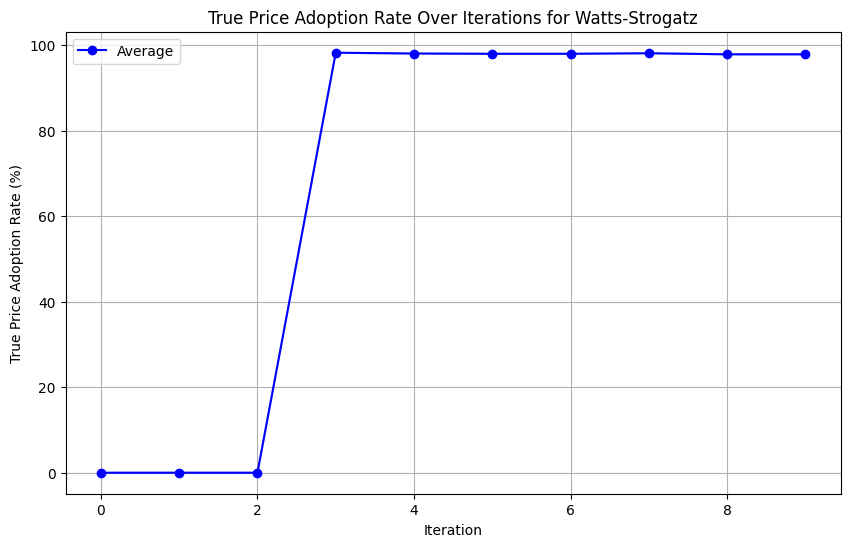

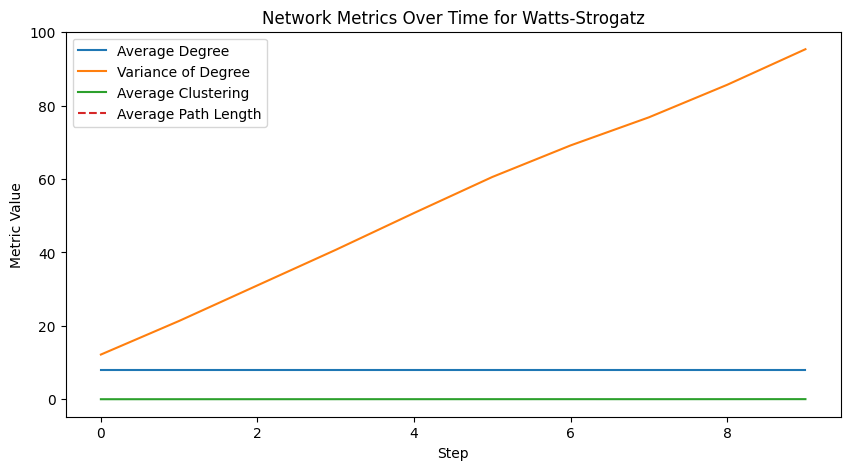

Running simulations for Barabasi-Albert network...


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]


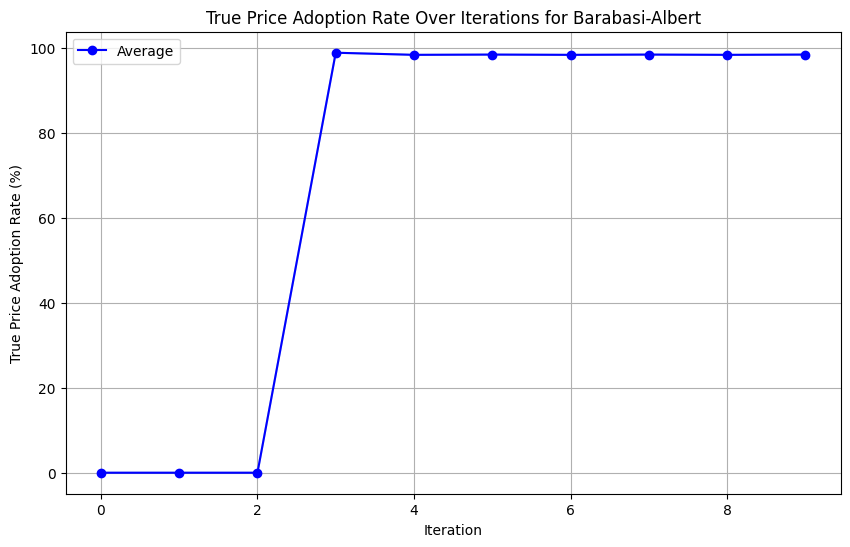

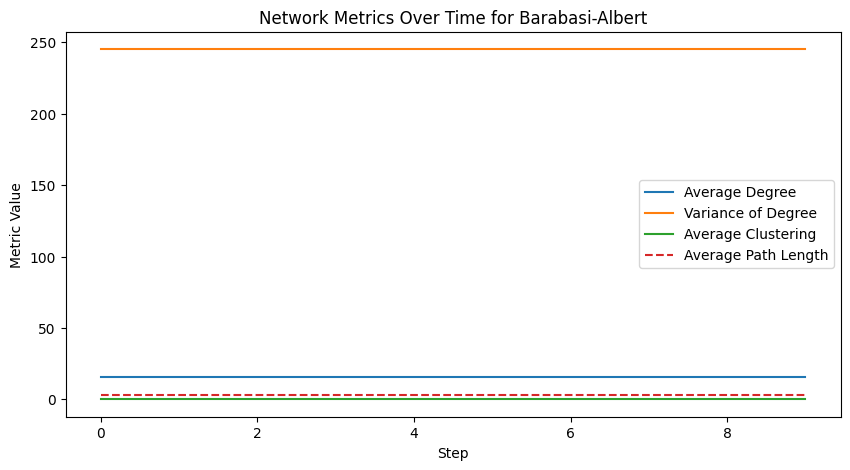

Running simulations for Random Regular network...


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]


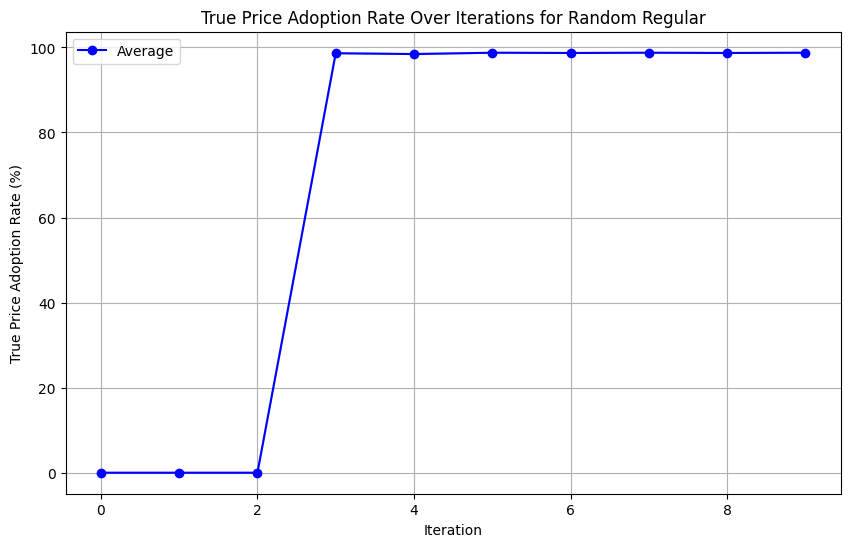

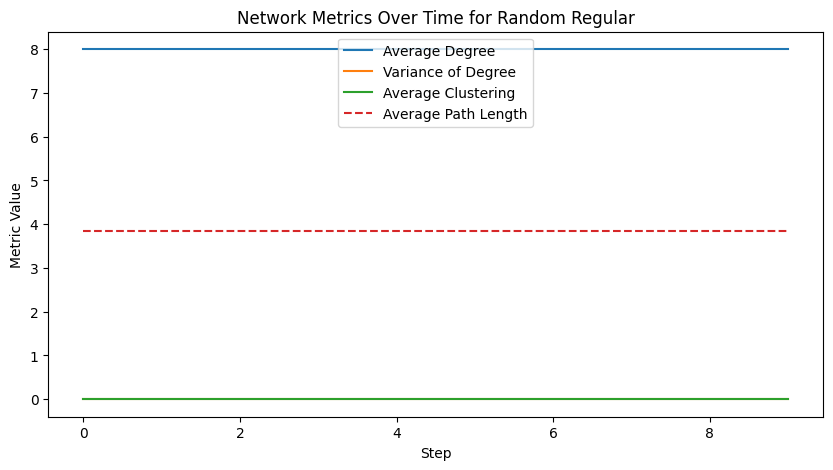

Running simulations for Holme-Kim network...


Simulation Progress: 100%|██████████| 10/10 [00:40<00:00,  4.06s/it]


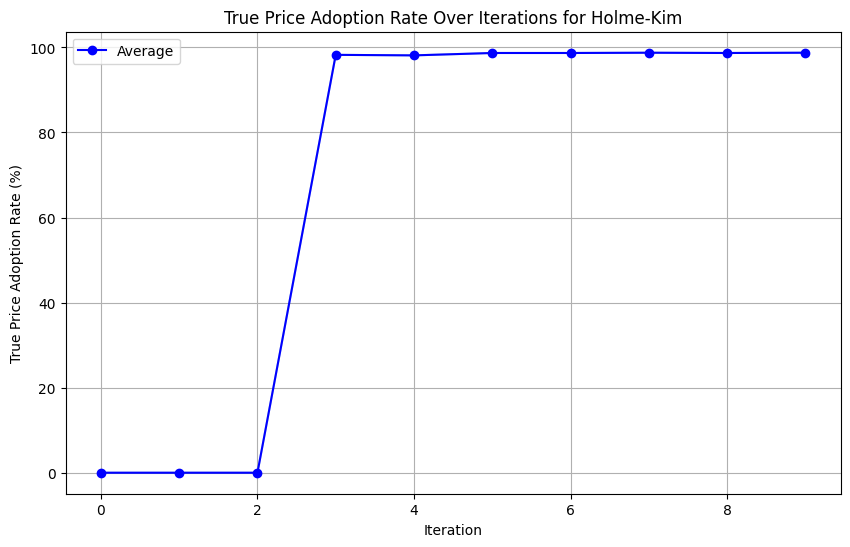

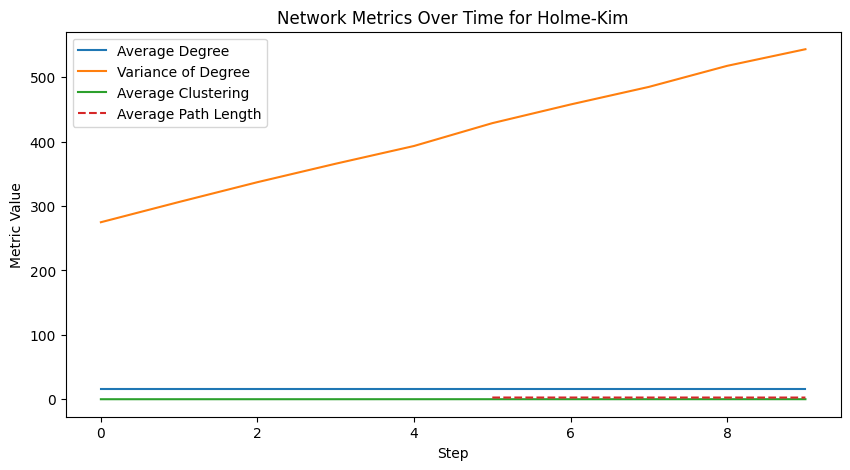

Simulation Progress: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


Decision Mode Counts for Watts-Strogatz network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        125     1311         164               0
2        319     1218          63               0
3        458     1127          15               0
4       1159      271         170               0
5       1470       92          38               0
6       1482       86          32               0
7       1480       89          31               0
8       1474       93          33               0
9       1480       87          33               0
10      1481       83          36               0


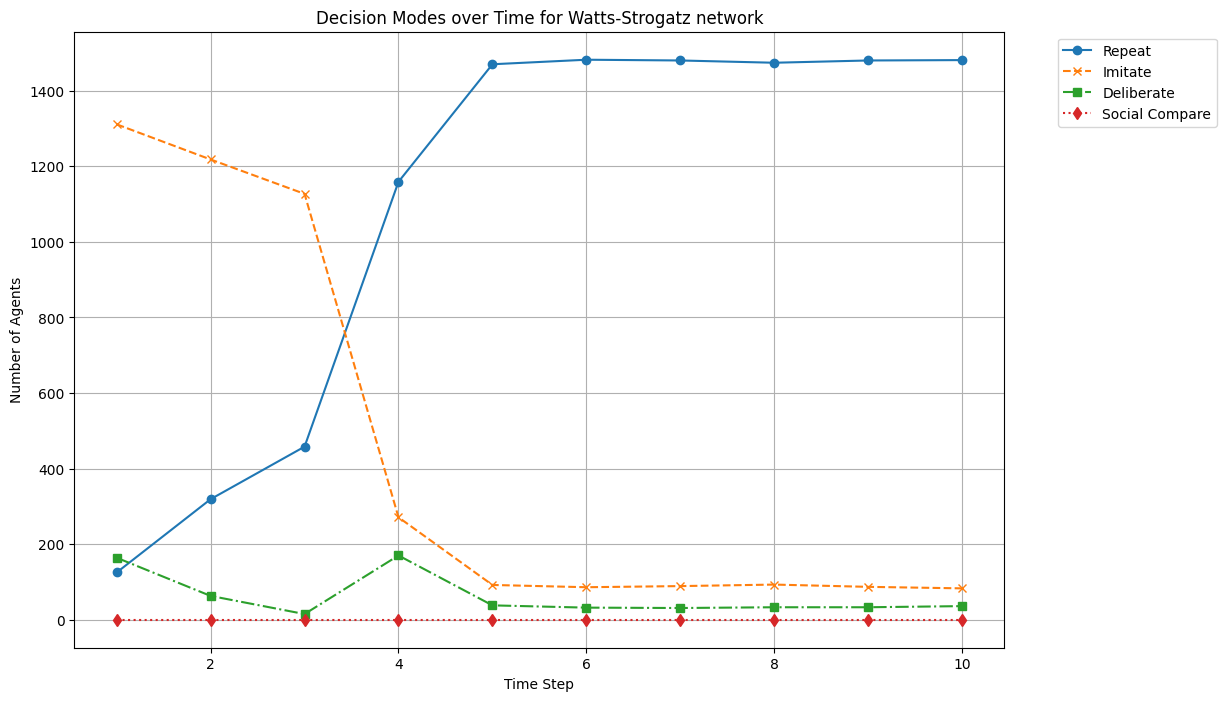

Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


Decision Mode Counts for Barabasi-Albert network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126     1311         163               0
2        365     1198          37               0
3        465     1128           7               0
4       1276      146         178               0
5       1503       70          27               0
6       1506       68          26               0
7       1506       70          24               0
8       1506       68          26               0
9       1506       70          24               0
10      1506       68          26               0


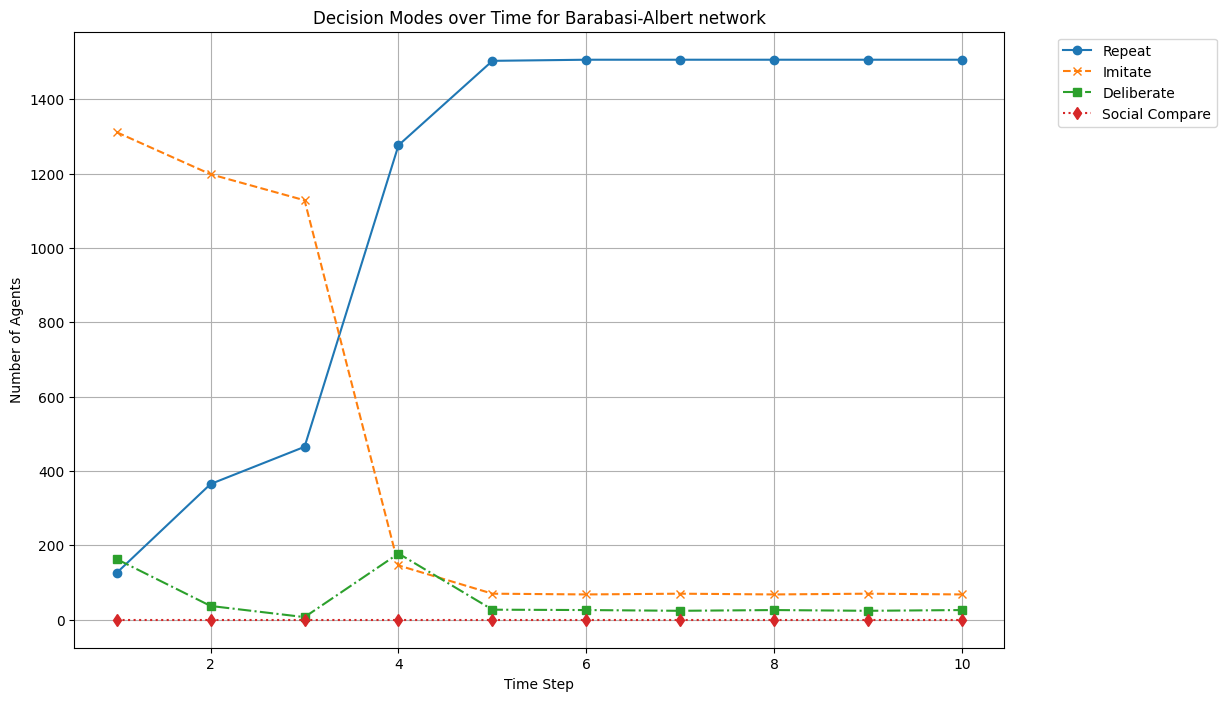

Simulation Progress: 100%|██████████| 10/10 [00:28<00:00,  2.89s/it]


Decision Mode Counts for Random Regular network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126     1311         163               0
2        311     1236          53               0
3        435     1158           7               0
4       1242      191         167               0
5       1503       67          30               0
6       1507       71          22               0
7       1507       71          22               0
8       1507       71          22               0
9       1507       71          22               0
10      1507       71          22               0


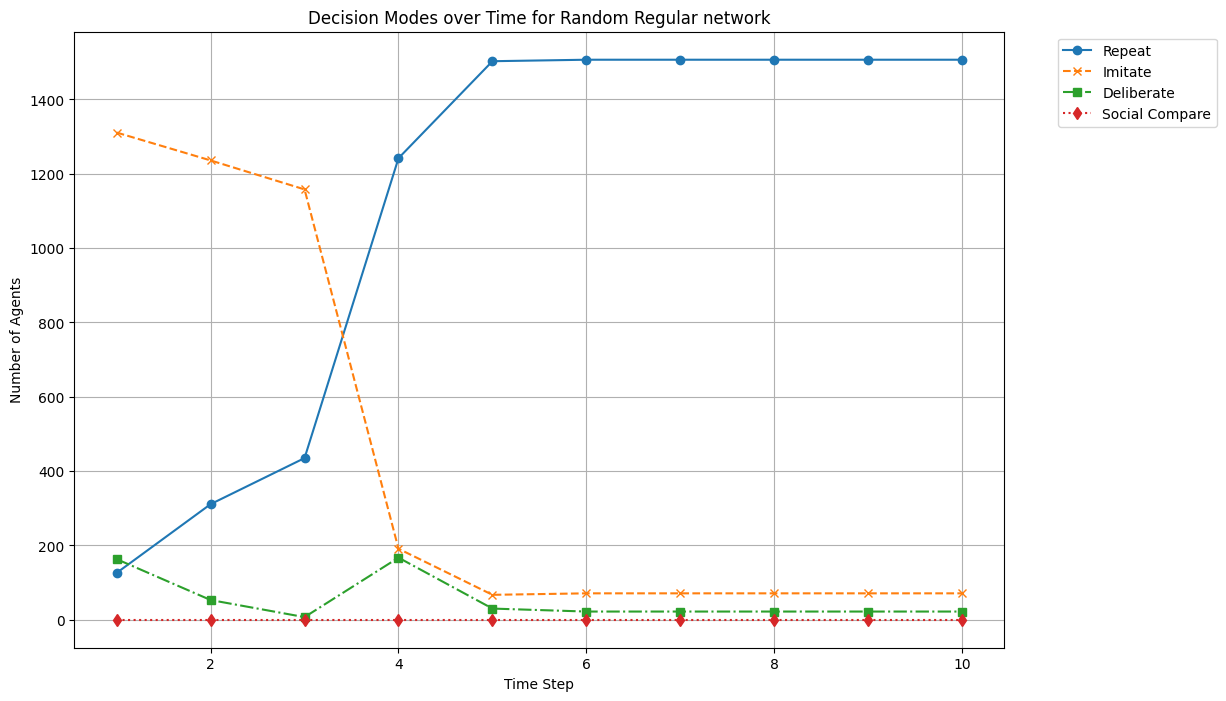

Simulation Progress: 100%|██████████| 10/10 [00:40<00:00,  4.07s/it]


Decision Mode Counts for Holme-Kim network:
      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        126     1311         163               0
2        341     1210          49               0
3        460     1132           8               0
4       1219      192         189               0
5       1502       68          30               0
6       1507       64          29               0
7       1508       67          25               0
8       1508       66          26               0
9       1508       66          26               0
10      1509       65          26               0


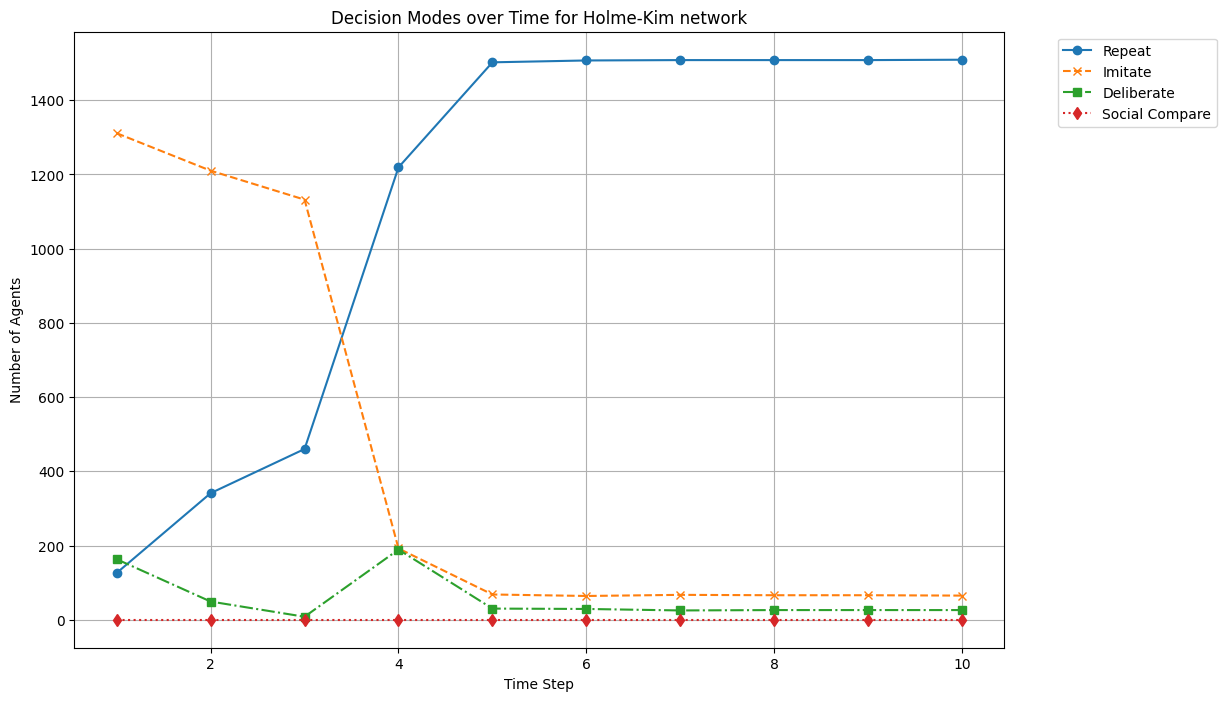

In [14]:
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates

    return model_data, agent_data

def run_all_simulations(configurations, num_steps, num_simulations):
    results = {}
    for config_name, config in configurations.items():
        print(f"Running simulations for {config_name} network...")

        # Store all simulation data for the current configuration
        all_simulation_data = []
        
        # Loop over the number of simulations
        for simulation in range(num_simulations):
            # Initialize the model with the current configuration
            model = ConsumatModel(config)
            
            # Run the model and collect data
            model_data, agent_data = run_simulation(model, num_steps)
            all_simulation_data.append(model_data)

        # Aggregate results for plotting
        aggregated_data = pd.concat(all_simulation_data).groupby(level=0).mean()

        results[config_name] = aggregated_data

        # Plotting True Price Adoption Rates
        plt.figure(figsize=(10, 6))
        for sim_data in all_simulation_data:
            plt.plot(sim_data['Adoption Rates'], alpha=0.3)  # Plot individual simulations with transparency
        plt.plot(aggregated_data['Adoption Rates'], marker='o', color='b', label='Average')
        plt.title(f'True Price Adoption Rate Over Iterations for {config_name}')
        plt.xlabel('Iteration')
        plt.ylabel('True Price Adoption Rate (%)')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plotting Network Metrics
        plt.figure(figsize=(10, 5))
        if 'Average Degree' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Degree'], label='Average Degree')
        if 'Variance of Degree' in aggregated_data.columns:
            plt.plot(aggregated_data['Variance of Degree'], label='Variance of Degree')
        if 'Average Clustering' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Clustering'], label='Average Clustering')
        if 'Average Path Length' in aggregated_data.columns:
            plt.plot(aggregated_data['Average Path Length'], label='Average Path Length', linestyle='--')
        plt.xlabel('Step')
        plt.ylabel('Metric Value')
        plt.title(f'Network Metrics Over Time for {config_name}')
        plt.legend()
        plt.show()

    return results

def generate_decision_modes_count(agent_data):
    decision_modes_count = agent_data.groupby(['Step'])[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']].sum()
    return decision_modes_count

# Example network configurations (replace with actual configurations)
network_configurations = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}

# Define the number of simulations and steps
num_simulations = 1
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

# Generate and plot decision mode counts
for network_name, config in network_configurations.items():
    model = ConsumatModel(config)
    _, agent_data = run_simulation(model, num_steps)
    
    # Generate the decision modes count DataFrame
    decision_modes_count = generate_decision_modes_count(agent_data)
    print(f"Decision Mode Counts for {network_name} network:")
    print(decision_modes_count)

    # Plot the decision modes count over time
    plt.figure(figsize=(12, 8))
    plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label='Repeat', linestyle='-', marker='o')
    plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label='Imitate', linestyle='--', marker='x')
    plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label='Deliberate', linestyle='-.', marker='s')
    plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label='Social Compare', linestyle=':', marker='d')
    plt.title(f'Decision Modes over Time for {network_name} network')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Agents')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


### Multiple runs of the same model:

Running simulations for Watts-Strogatz network...


Simulation Progress: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


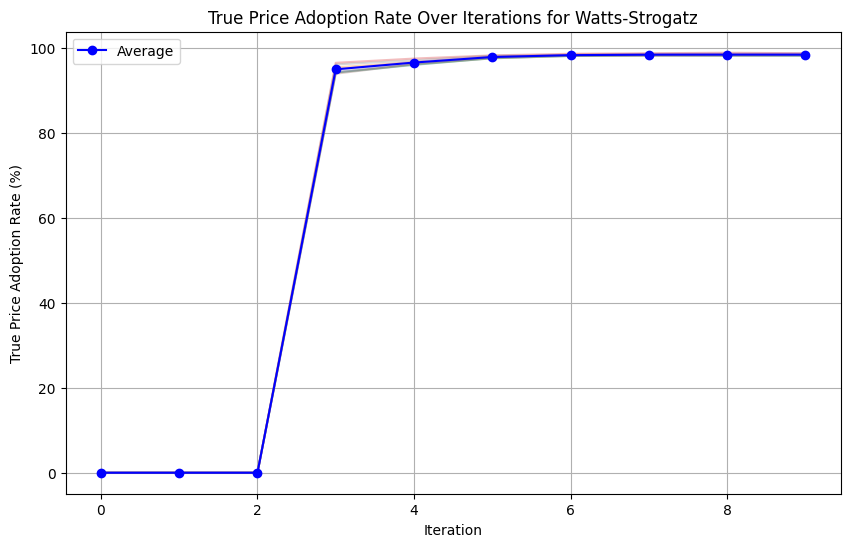

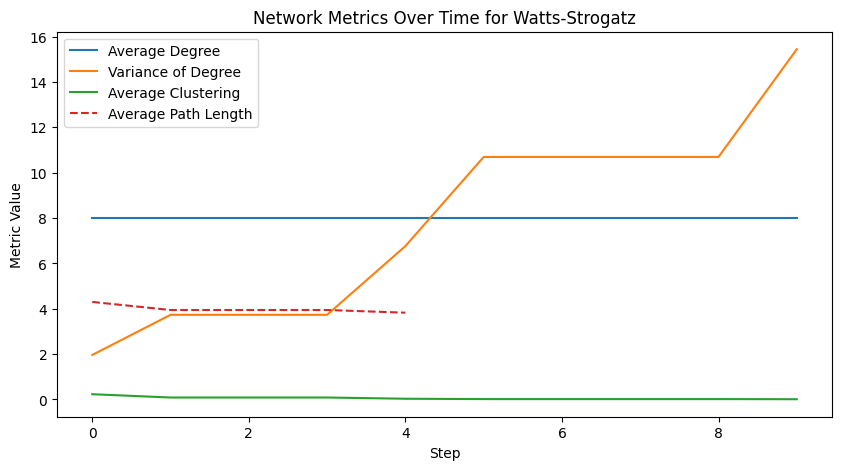

Running simulations for Barabasi-Albert network...


Simulation Progress: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


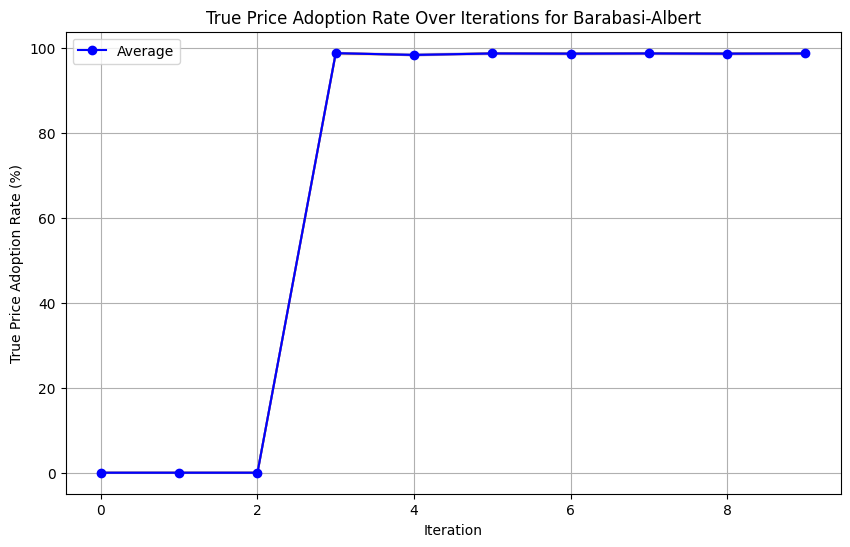

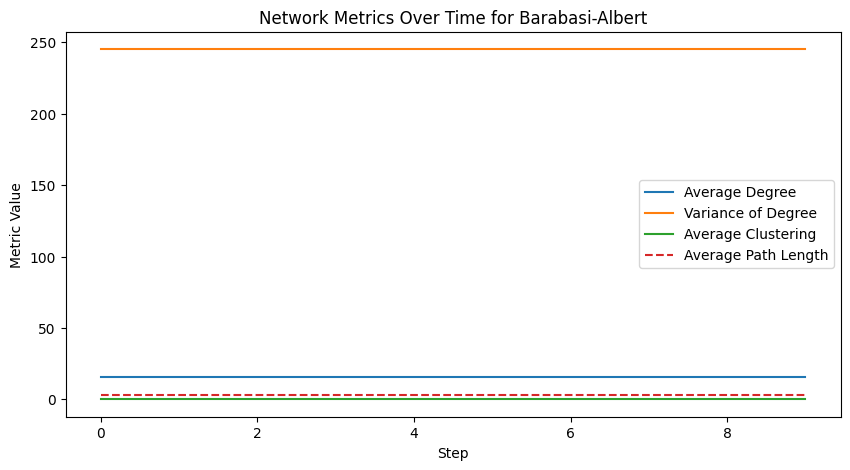

Running simulations for Random Regular network...


Simulation Progress: 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]


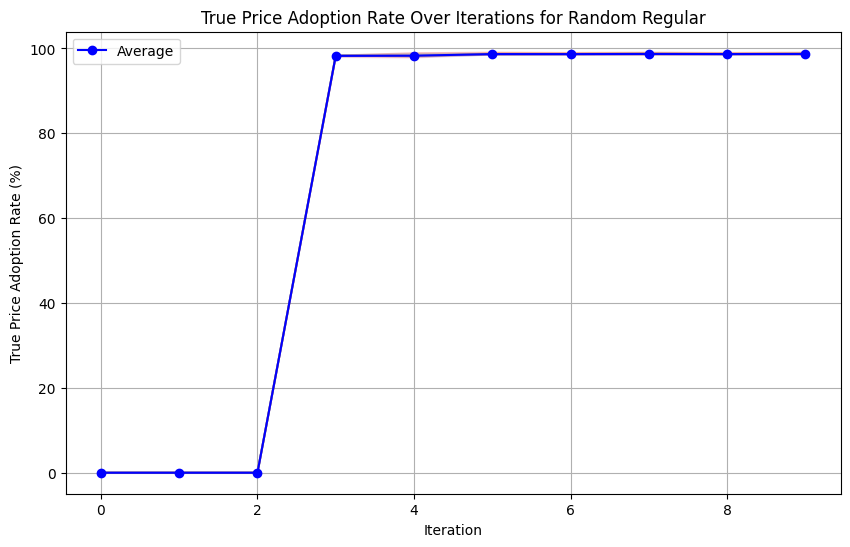

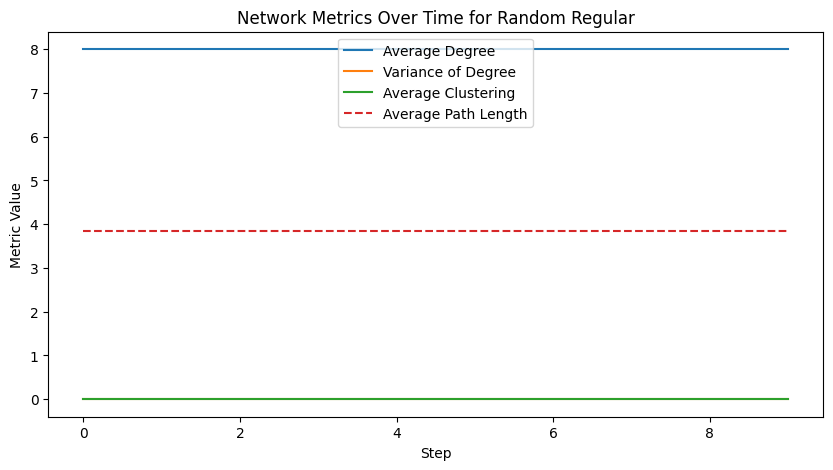

Running simulations for Holme-Kim network...


Simulation Progress: 100%|██████████| 10/10 [00:35<00:00,  3.52s/it]


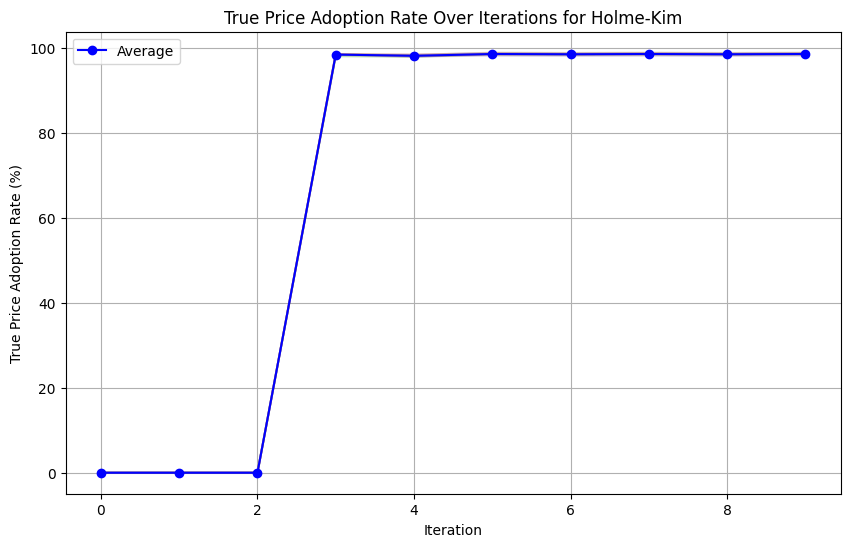

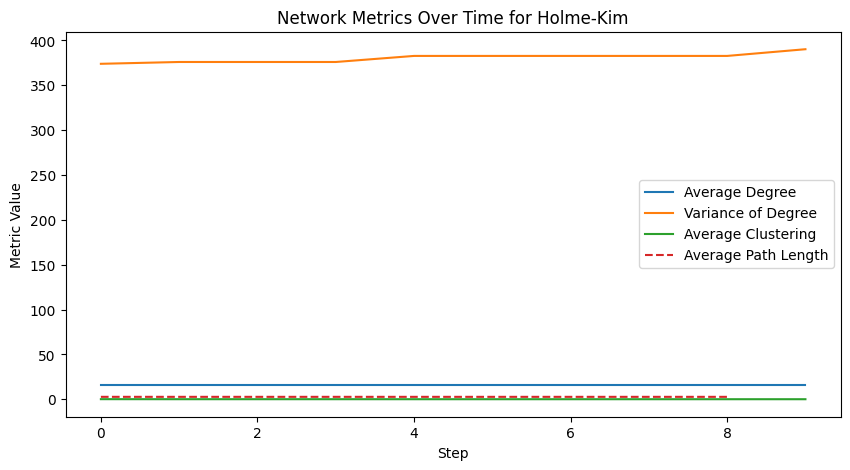

In [5]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})


# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})

# Define the number of simulations and steps
num_simulations = 8
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

Running simulations for Holme-Kim network...


Simulation Progress: 100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


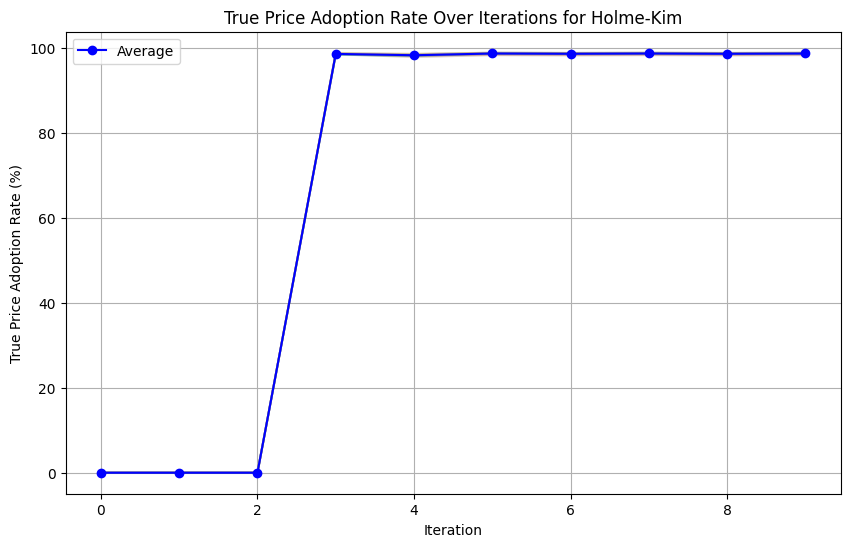

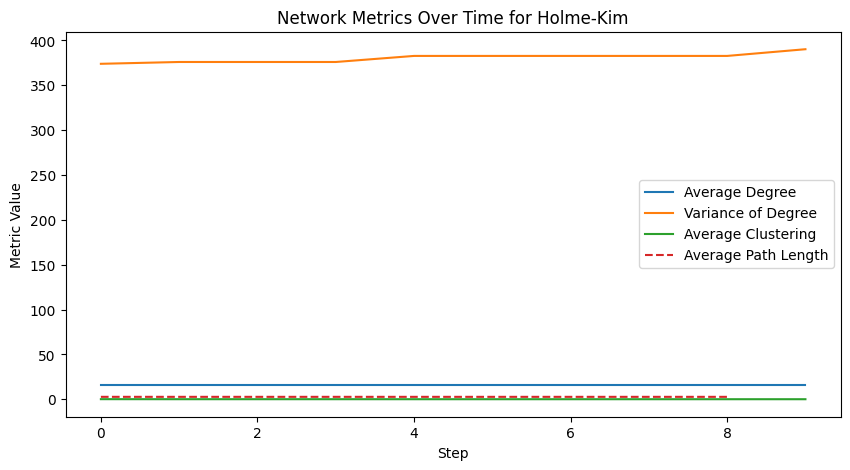

In [6]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})
network_configurations = {
    'Holme-Kim': holme_kim_config
}
# Define the number of simulations and steps
num_simulations = 10
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

Running simulations for Holme-Kim network...


Simulation Progress: 100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


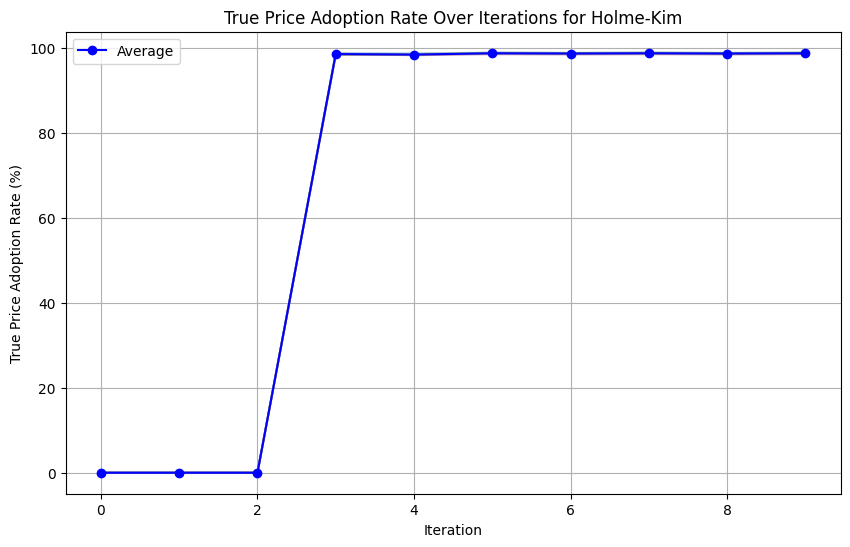

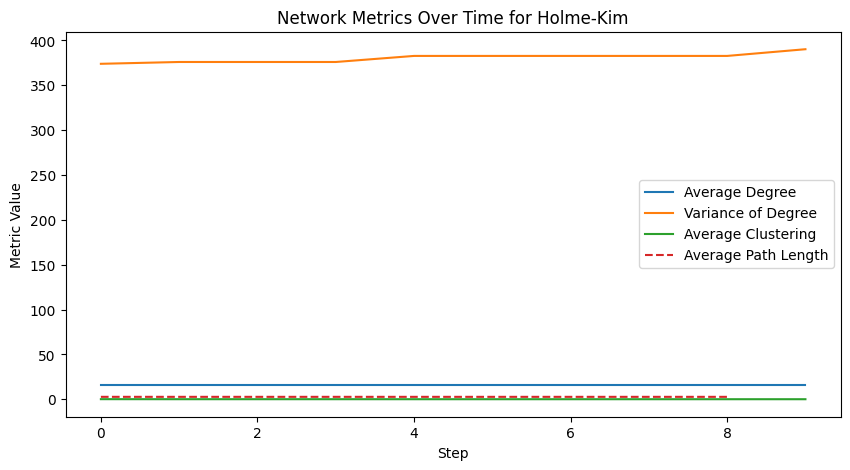

In [7]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})
network_configurations = {
    'Holme-Kim': holme_kim_config
}
# Define the number of simulations and steps
num_simulations = 10
num_steps = 10

# Run all simulations
results = run_all_simulations(network_configurations, num_steps, num_simulations)

### Vary network parameters

Simulation Progress: 100%|██████████| 10/10 [00:40<00:00,  4.09s/it]


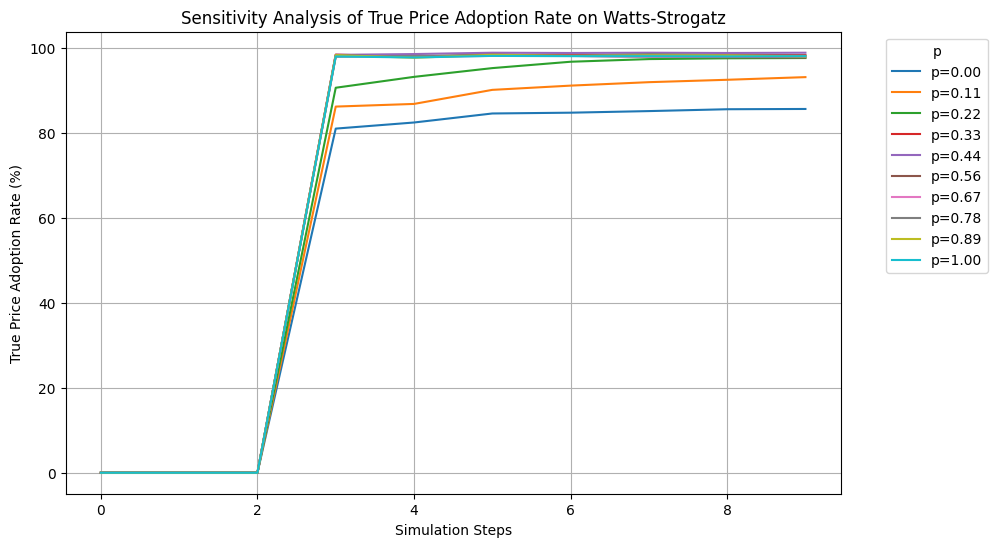

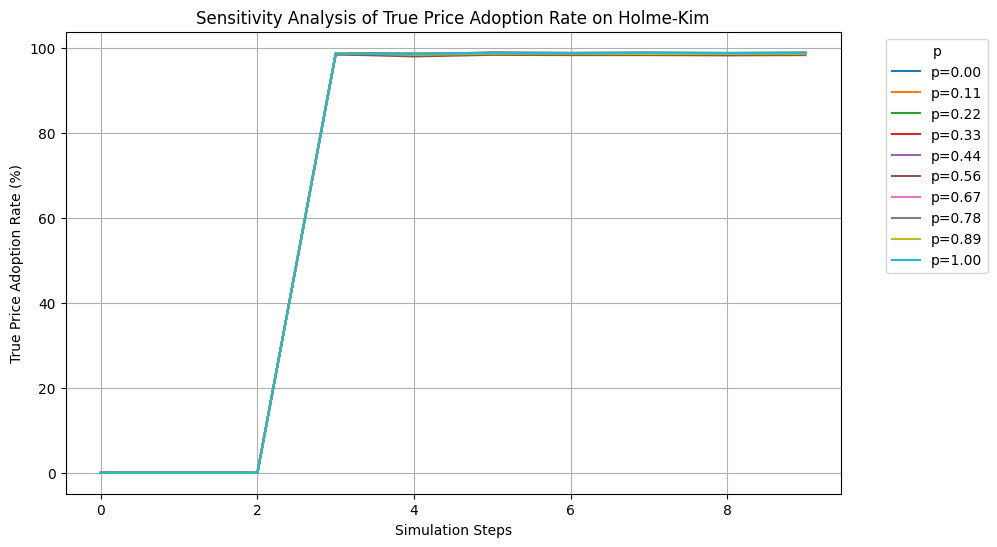

In [8]:

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})
def run_simulation_with_varying_network_params(base_config, parameter_name, parameter_values, num_steps):
    all_results = {}
    for value in parameter_values:
        # Update the network parameter
        config = base_config.copy()
        config['network_params'][parameter_name] = value
        model = ConsumatModel(config)
        result, _ = run_simulation(model, num_steps)
        all_results[value] = result['Adoption Rates']
    return all_results


# Example for varying 'p' in a Watts-Strogatz network
parameter_name = 'p'
parameter_values = np.linspace(0, 1, 10)
num_steps = 10

watts_strogatz_results = run_simulation_with_varying_network_params(
    watts_strogatz_config,
    parameter_name,
    parameter_values,
    num_steps
)

holme_kim_results = run_simulation_with_varying_network_params(
    holme_kim_config,
    parameter_name,
    parameter_values,
    num_steps
)

# Plot the results for Watts-Strogatz
plt.figure(figsize=(10, 6))
for value, adoption_rates in watts_strogatz_results.items():
    plt.plot(range(num_steps), adoption_rates, label=f'{parameter_name}={value:.2f}')
plt.title('Sensitivity Analysis of True Price Adoption Rate on Watts-Strogatz')
plt.xlabel('Simulation Steps')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title=parameter_name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot the results for Holme-Kim
plt.figure(figsize=(10, 6))
for value, adoption_rates in holme_kim_results.items():
    plt.plot(range(num_steps), adoption_rates, label=f'{parameter_name}={value:.2f}')
plt.title('Sensitivity Analysis of True Price Adoption Rate on Holme-Kim')
plt.xlabel('Simulation Steps')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title=parameter_name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Vary True Price percentage

Running simulations for Watts-Strogatz network...


TP Percentage Progress: 100%|██████████| 19/19 [02:24<00:00,  7.60s/it]


Running simulations for Barabasi-Albert network...


TP Percentage Progress: 100%|██████████| 19/19 [09:38<00:00, 30.43s/it]


Running simulations for Random Regular network...


TP Percentage Progress: 100%|██████████| 19/19 [09:28<00:00, 29.93s/it]


Running simulations for Holme-Kim network...


TP Percentage Progress: 100%|██████████| 19/19 [04:30<00:00, 14.26s/it]


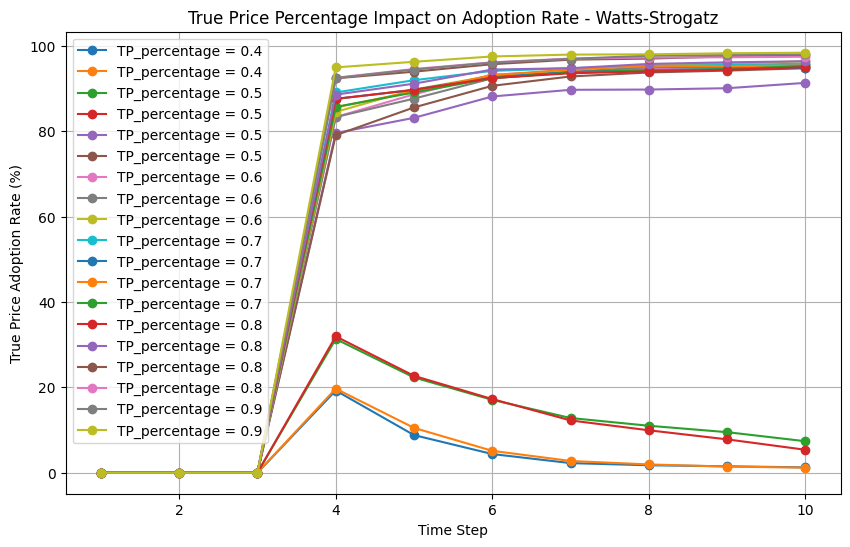

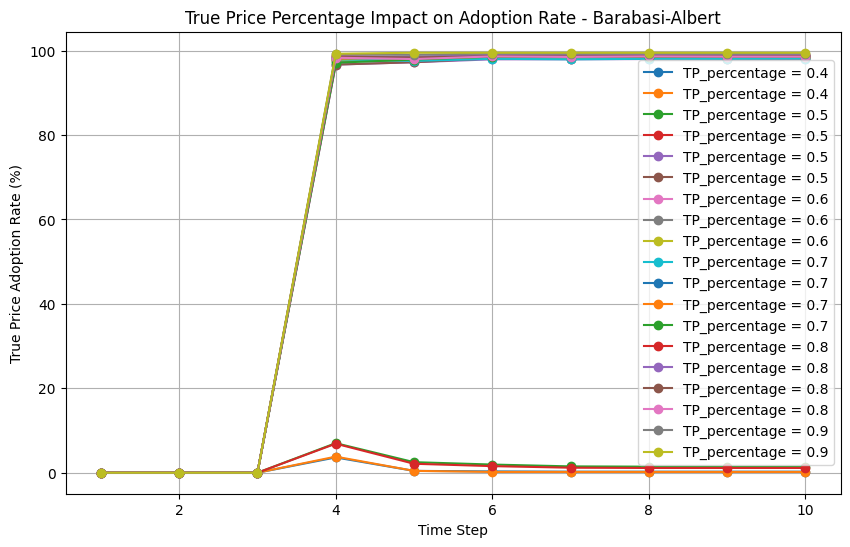

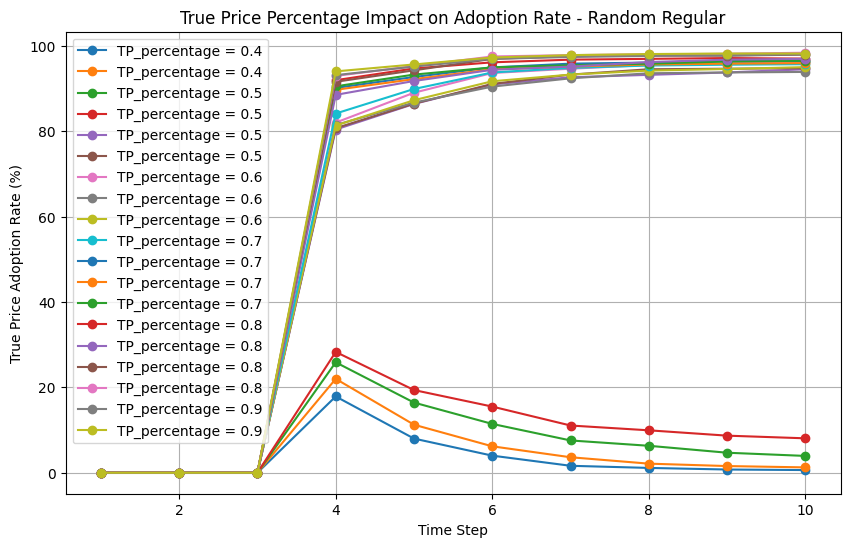

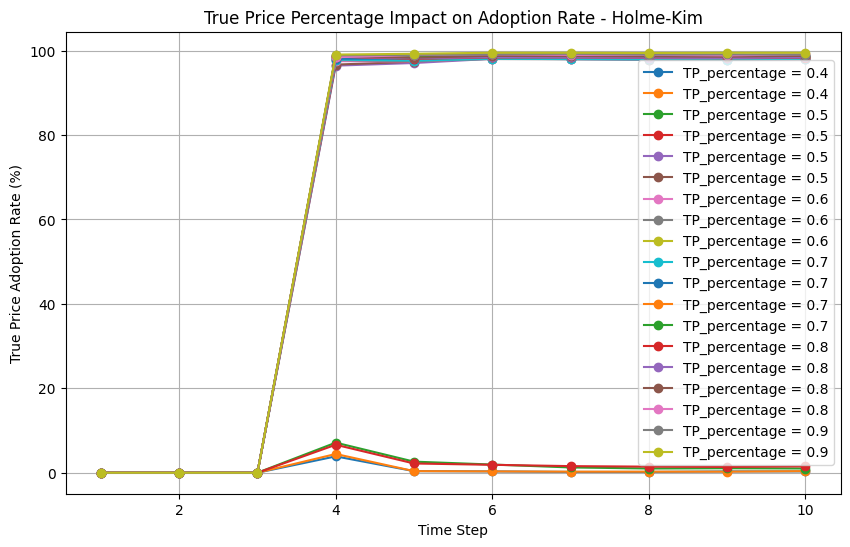

In [10]:

# Base configuration
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 4,
            'p': 0.2
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 4
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 4
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 4,
            'p': 0.1
        }
    }
}

# Define a range of values for TP_percentage
tp_percentages = np.linspace(0.4, 0.9, 19)  # From 10% to 90%, with increments of 10%

# Hold the number of steps constant for each simulation
num_steps = 10

# Function to run simulations for each TP_percentage
def run_simulation_for_tp_percentage(config, tp_percentages, num_steps):
    adoption_rates_by_tp_percentage = []

    for tp_percentage in tqdm(tp_percentages, desc='TP Percentage Progress'):
        # Update the config with the current TP_percentage
        config['TP_percentage'] = tp_percentage
        
        # Run the simulation
        model = ConsumatModel(config)
        model_data, _ = run_simulation(model, num_steps)
        
        # Extract the adoption rates from the DataFrame
        adoption_rates = model_data['Adoption Rates'].values
        
        # Store the adoption rates for this TP_percentage
        adoption_rates_by_tp_percentage.append(adoption_rates)
    
    return adoption_rates_by_tp_percentage

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    print(f"Running simulations for {network_name} network...")
    config = base_config.copy()
    config.update(network_config)
    adoption_rates_by_tp_percentage = run_simulation_for_tp_percentage(config, tp_percentages, num_steps)
    all_network_results[network_name] = adoption_rates_by_tp_percentage

# Plot the results for each network
for network_name, adoption_rates_by_tp_percentage in all_network_results.items():
    plt.figure(figsize=(10, 6))
    for i, tp_percentage in enumerate(tp_percentages):
        plt.plot(range(1, num_steps + 1), adoption_rates_by_tp_percentage[i], label=f'TP_percentage = {tp_percentage:.1f}', marker='o')
    plt.title(f'True Price Percentage Impact on Adoption Rate - {network_name}')
    plt.xlabel('Time Step')
    plt.ylabel('True Price Adoption Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

Running simulations for Watts-Strogatz network...


TP Percentage Progress: 100%|██████████| 19/19 [02:26<00:00,  7.70s/it]


Running simulations for Barabasi-Albert network...


TP Percentage Progress: 100%|██████████| 19/19 [21:45<00:00, 68.74s/it] 


Running simulations for Random Regular network...


TP Percentage Progress: 100%|██████████| 19/19 [10:02<00:00, 31.70s/it]


Running simulations for Holme-Kim network...


TP Percentage Progress: 100%|██████████| 19/19 [04:31<00:00, 14.30s/it]


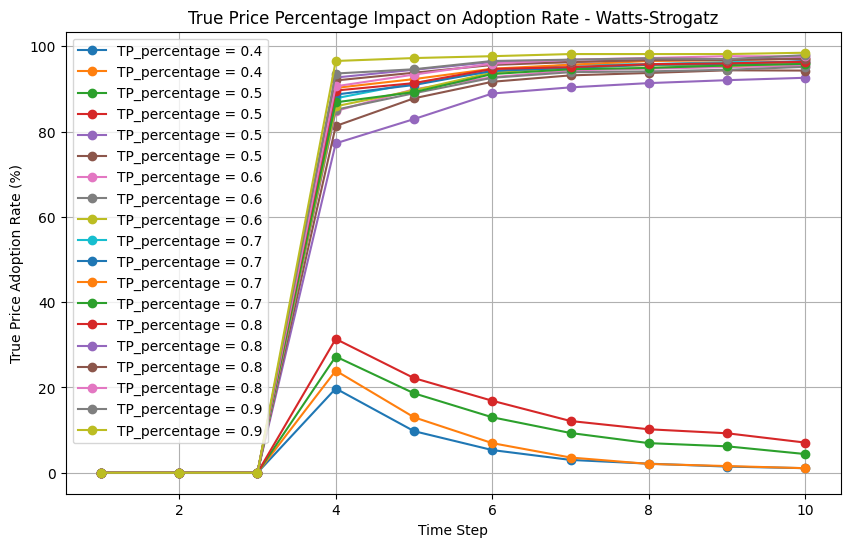

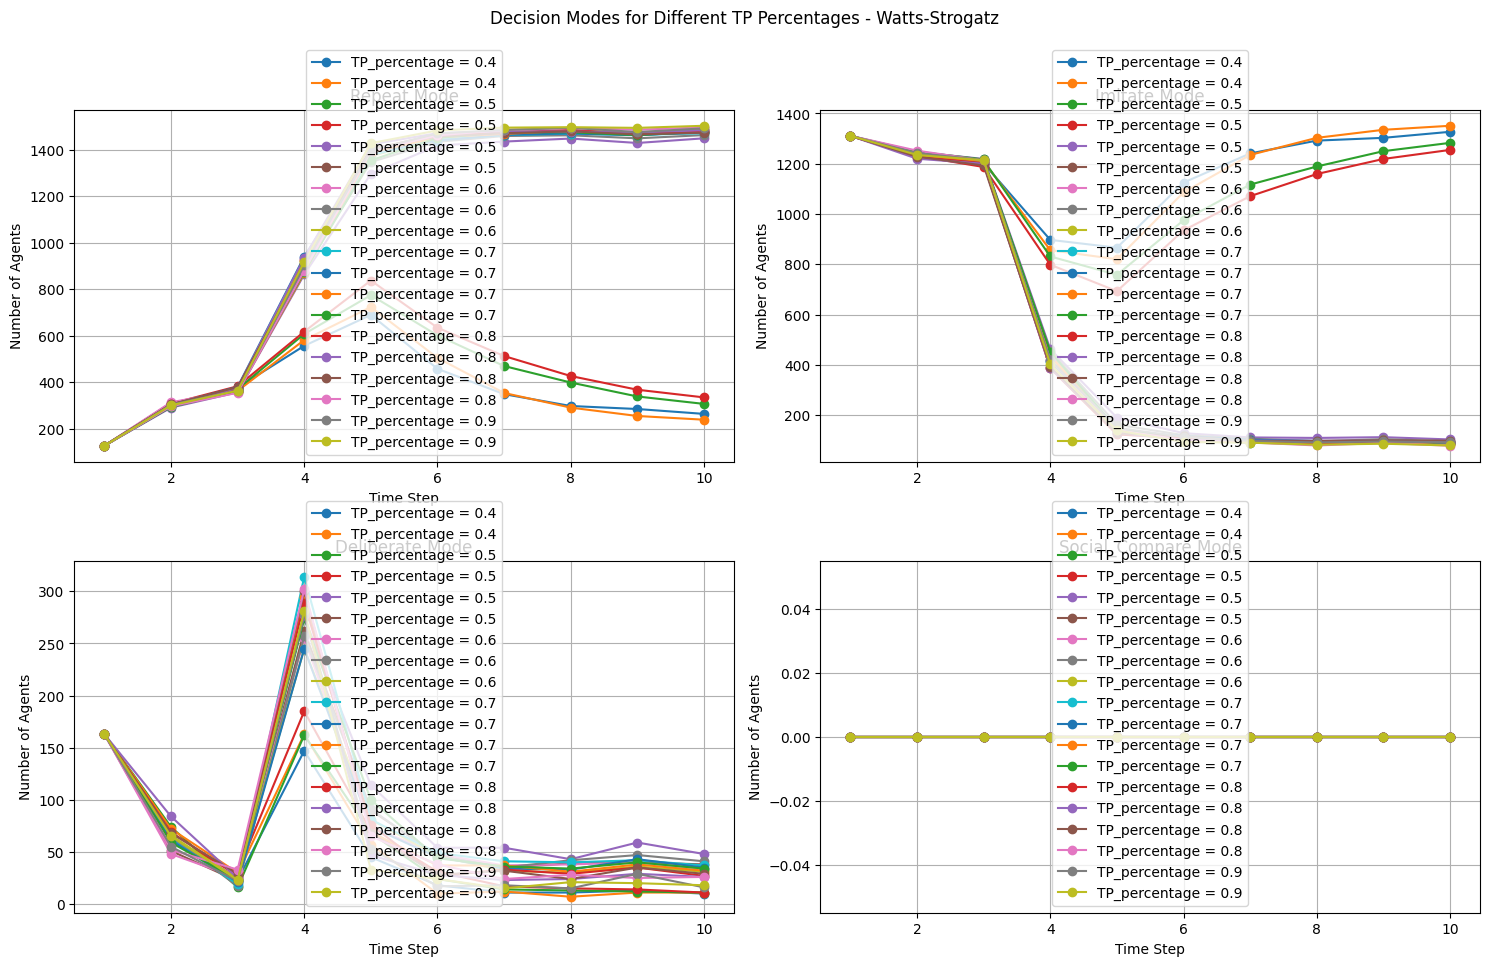

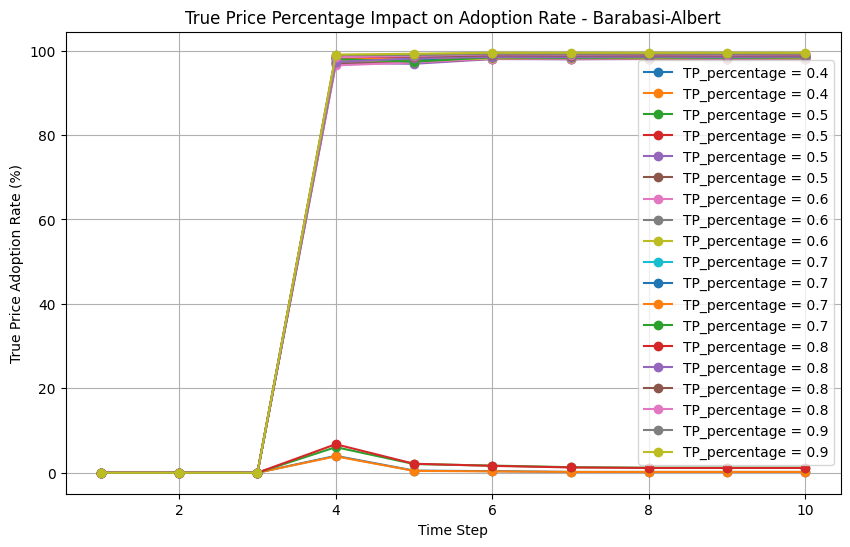

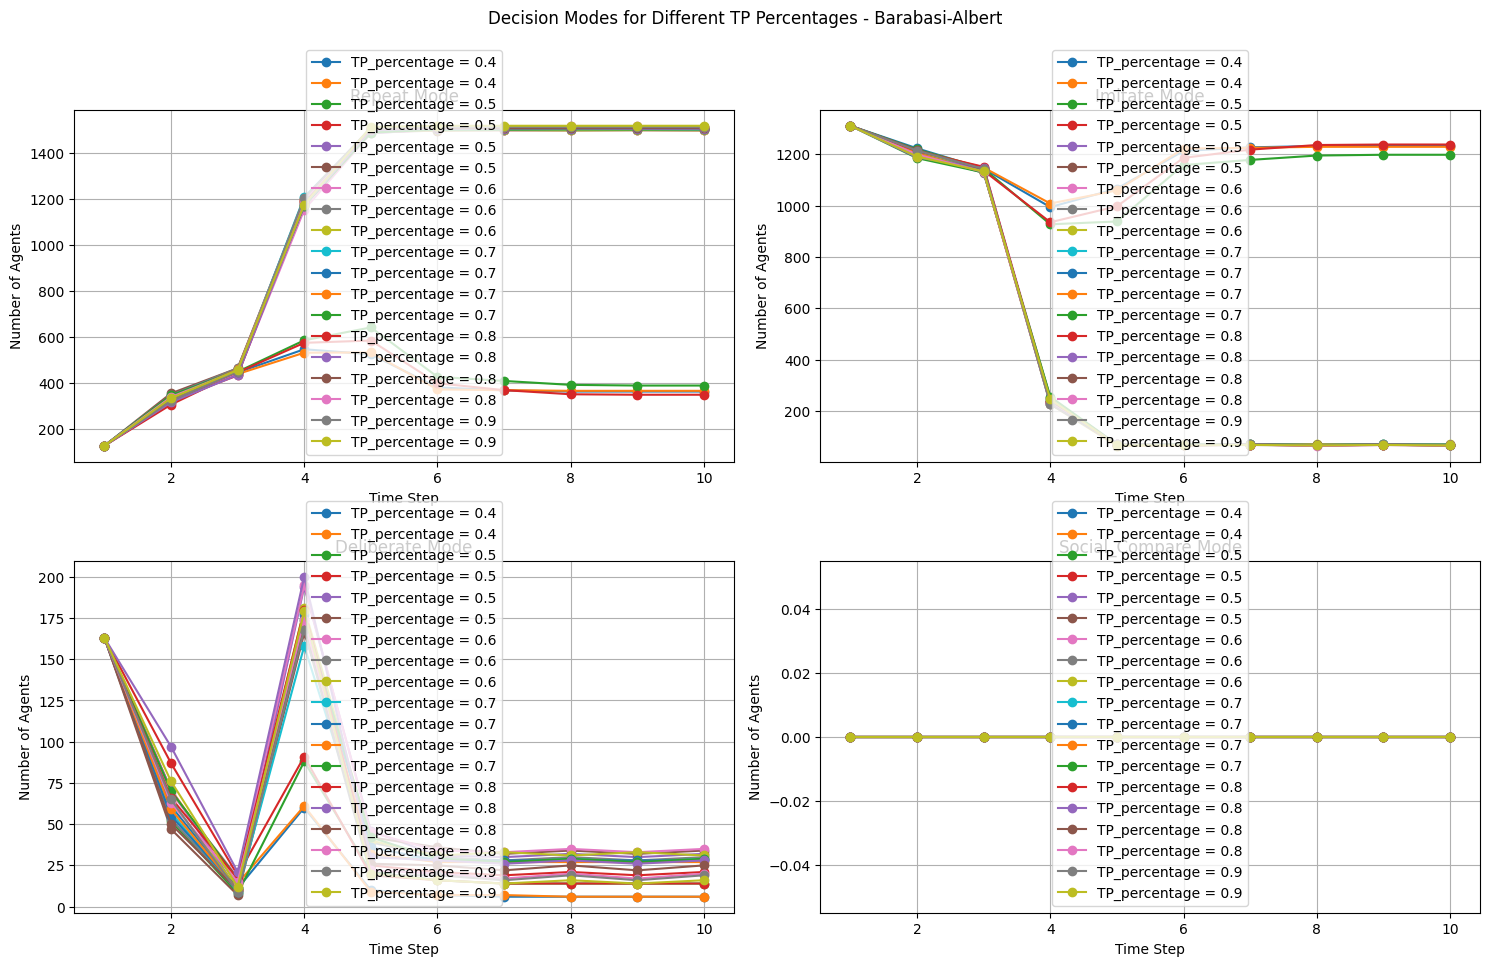

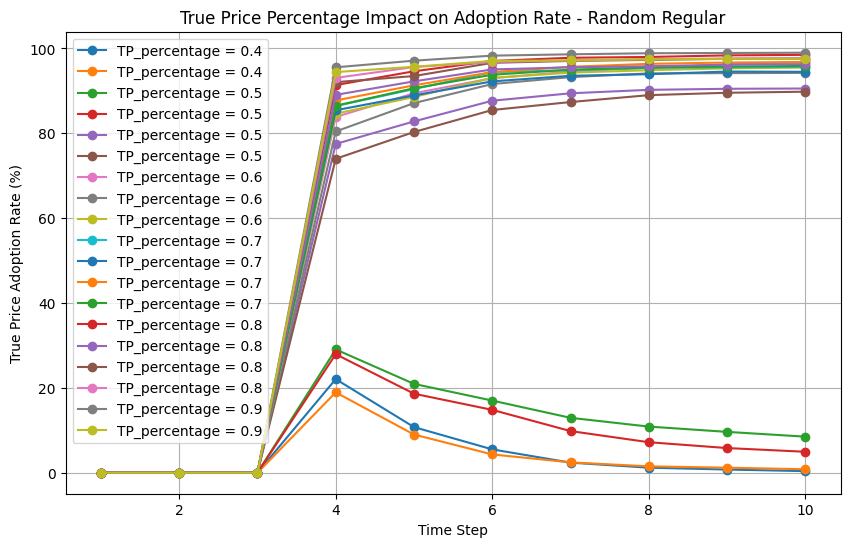

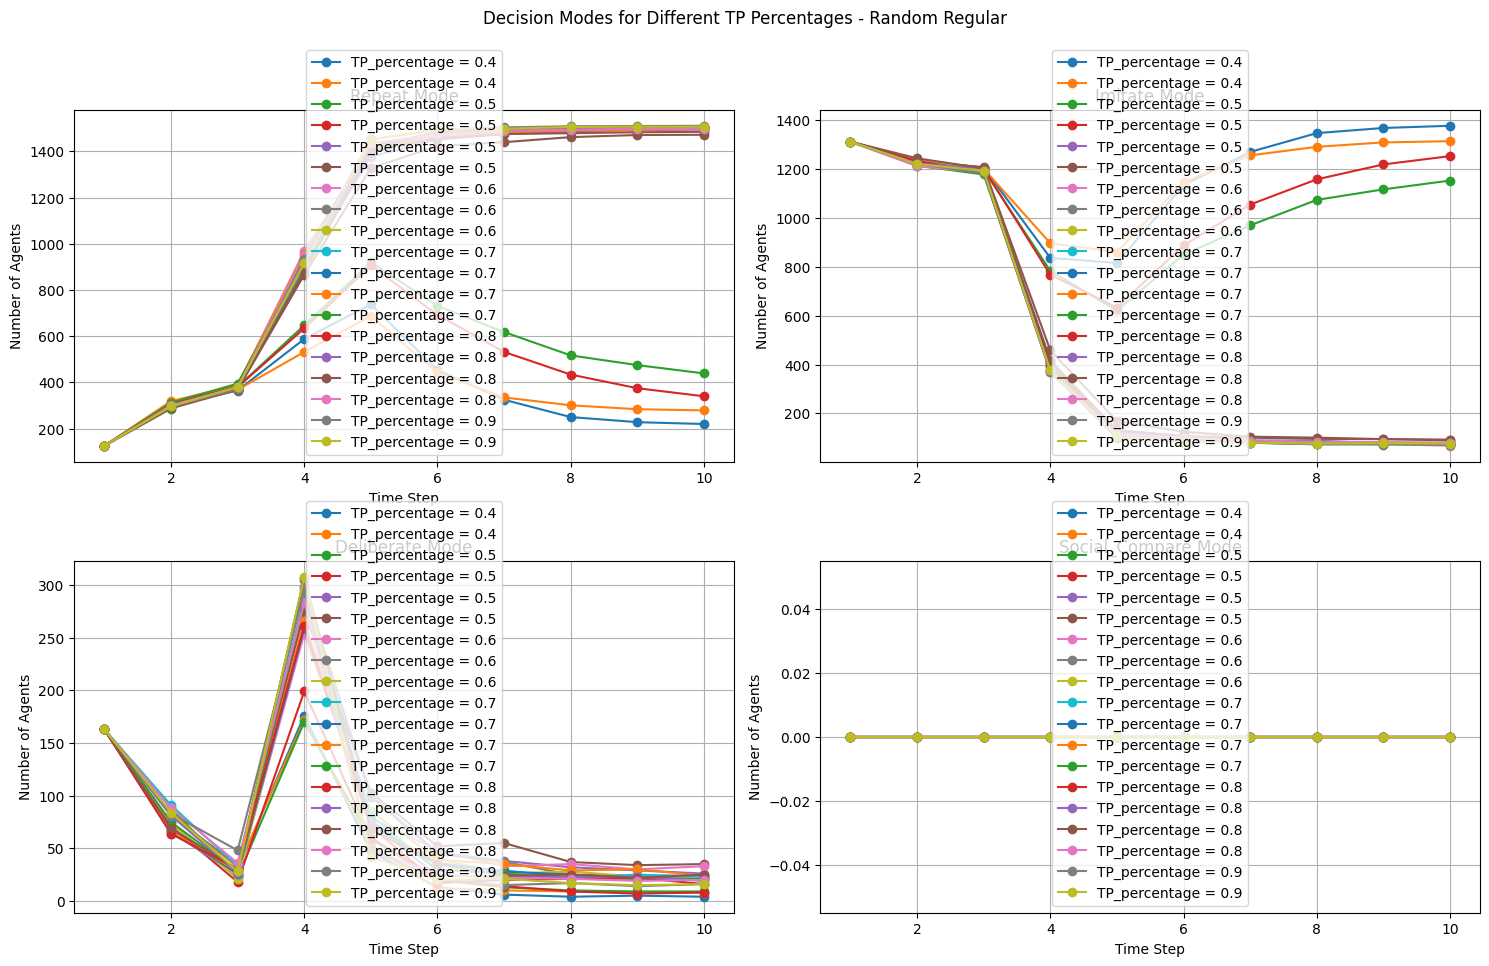

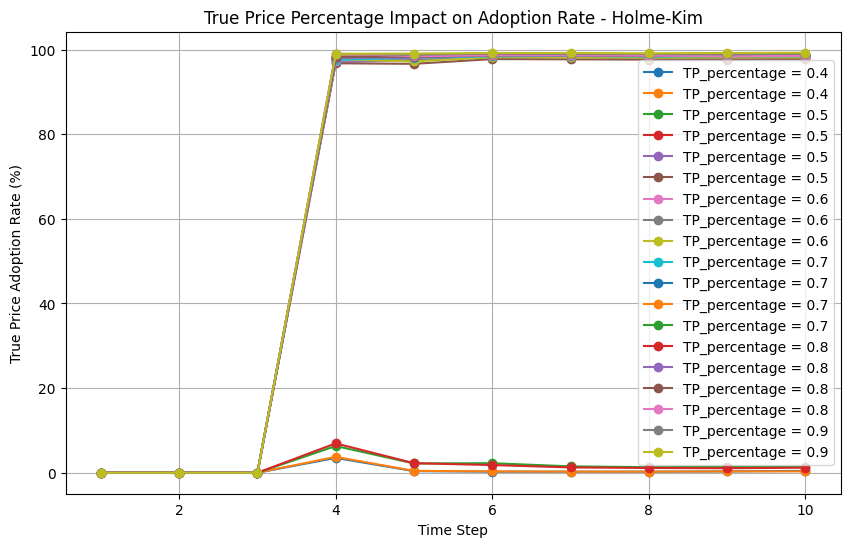

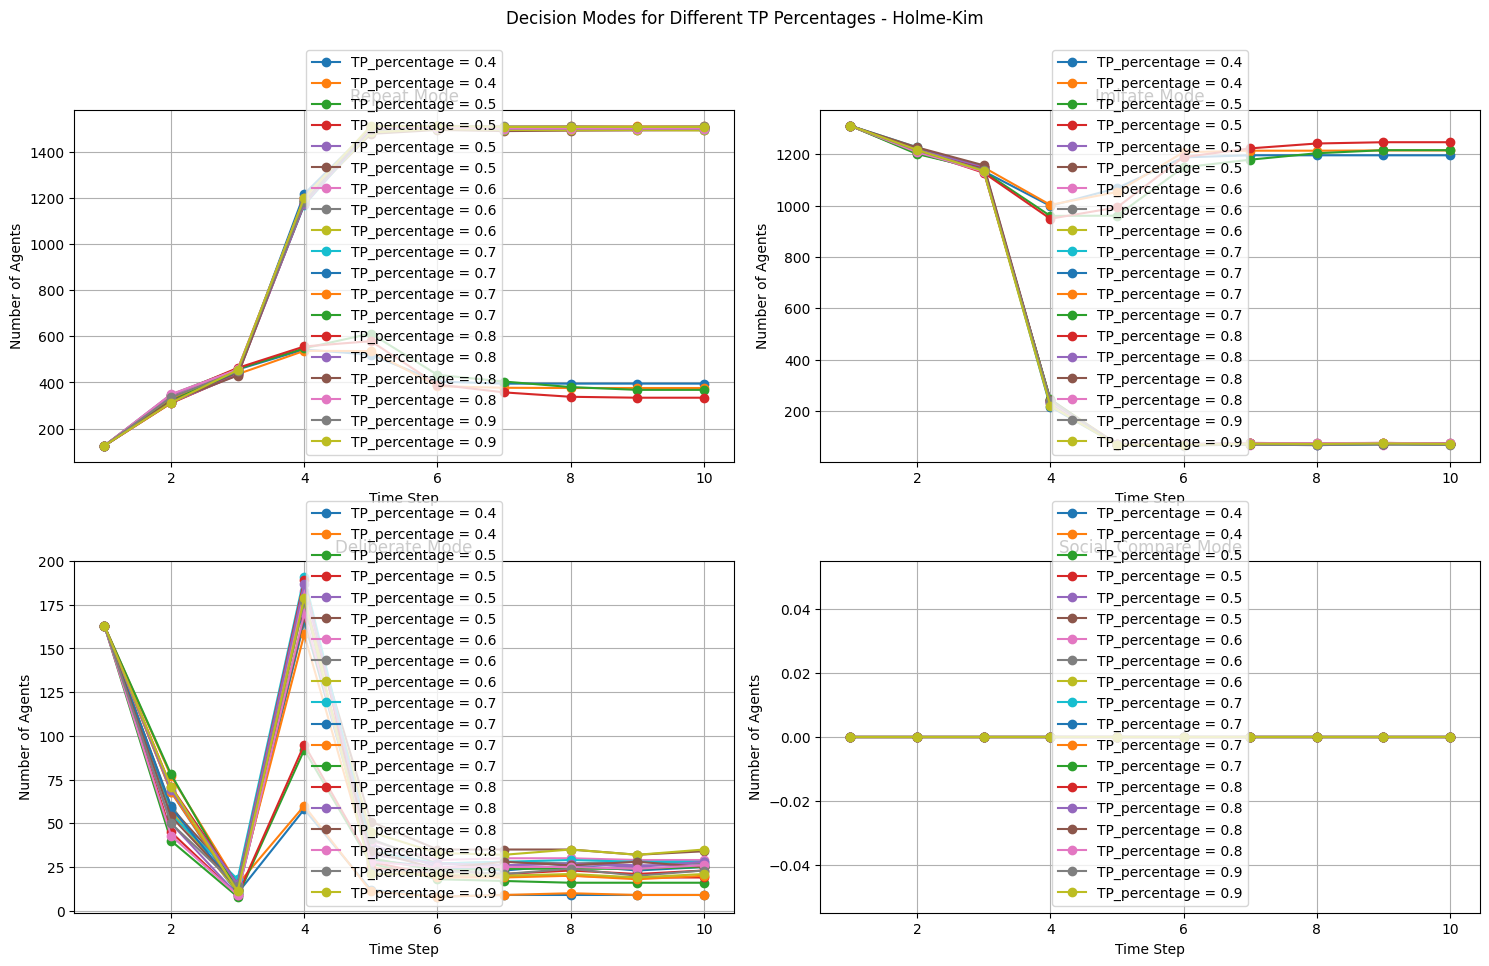

In [15]:
def run_simulation_for_tp_percentage(config, tp_percentages, num_steps):
    results_by_tp_percentage = []

    for tp_percentage in tqdm(tp_percentages, desc='TP Percentage Progress'):
        # Update the config with the current TP_percentage
        config['TP_percentage'] = tp_percentage
        
        # Run the simulation
        model = ConsumatModel(config)
        model_data, agent_data = run_simulation(model, num_steps)
        
        # Extract the adoption rates and decision modes from the DataFrame
        adoption_rates = model_data['Adoption Rates'].values
        decision_modes_count = generate_decision_modes_count(agent_data)
        
        # Store the adoption rates and decision modes for this TP_percentage
        results_by_tp_percentage.append((adoption_rates, decision_modes_count))
    
    return results_by_tp_percentage
# Base configuration
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'seed': 42  # Seed for reproducibility
}

# Network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 4,
            'p': 0.2
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 4
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 4
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 4,
            'p': 0.1
        }
    }
}

# Define a range of values for TP_percentage
tp_percentages = np.linspace(0.4, 0.9, 19)  # From 40% to 90%

# Hold the number of steps constant for each simulation
num_steps = 10

# Function to generate decision modes count DataFrame
def generate_decision_modes_count(agent_data):
    decision_modes_count = agent_data.groupby(['Step'])[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']].sum()
    return decision_modes_count

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    print(f"Running simulations for {network_name} network...")
    config = base_config.copy()
    config.update(network_config)
    results_by_tp_percentage = run_simulation_for_tp_percentage(config, tp_percentages, num_steps)
    all_network_results[network_name] = results_by_tp_percentage

# Plot the results for each network
for network_name, results_by_tp_percentage in all_network_results.items():
    # Plot True Price Adoption Rates
    plt.figure(figsize=(10, 6))
    for i, (adoption_rates, _) in enumerate(results_by_tp_percentage):
        plt.plot(range(1, num_steps + 1), adoption_rates, label=f'TP_percentage = {tp_percentages[i]:.1f}', marker='o')
    plt.title(f'True Price Percentage Impact on Adoption Rate - {network_name}')
    plt.xlabel('Time Step')
    plt.ylabel('True Price Adoption Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Decision Modes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Decision Modes for Different TP Percentages - {network_name}')

    mode_labels = ['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']
    for idx, mode in enumerate(mode_labels):
        ax = axs[idx // 2, idx % 2]
        for i, (_, decision_modes_count) in enumerate(results_by_tp_percentage):
            ax.plot(decision_modes_count.index, decision_modes_count[mode], label=f'TP_percentage = {tp_percentages[i]:.1f}', marker='o')
        ax.set_title(f'{mode} Mode')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Number of Agents')
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Network: watts_strogatz
Average degree: 4.0
Rewiring probability: 0.2
Clustering coefficient: 0.27265029761904713
Average path length: 7.4593667917448405
Degree distribution: (array([  0,   0,  44, 366, 808, 317,  59,   6]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Agent 0 has 6 neighbors
Agent 1 has 5 neighbors
Agent 2 has 4 neighbors
Agent 3 has 3 neighbors
Agent 4 has 3 neighbors
Network: barabasi_albert
Average degree: 7.98
Rewiring probability: N/A
Clustering coefficient: 0.023801877006292486
Average path length: 3.344541119449656
Degree distribution: (array([  0,   0,   0,   0, 510, 327, 192, 126,  87,  51,  54,  37,  24,
        22,  24,  26,  14,  12,   5,  10,   6,   7,   8,   6,   4,   4,
         4,   2,   3,   2,   0,   1,   1,   0,   1,   1,   4,   0,   0,
         2,   0,   1,   1,   1,   2,   1,   1,   0,   0,   1,   2,   1,
         0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,
         

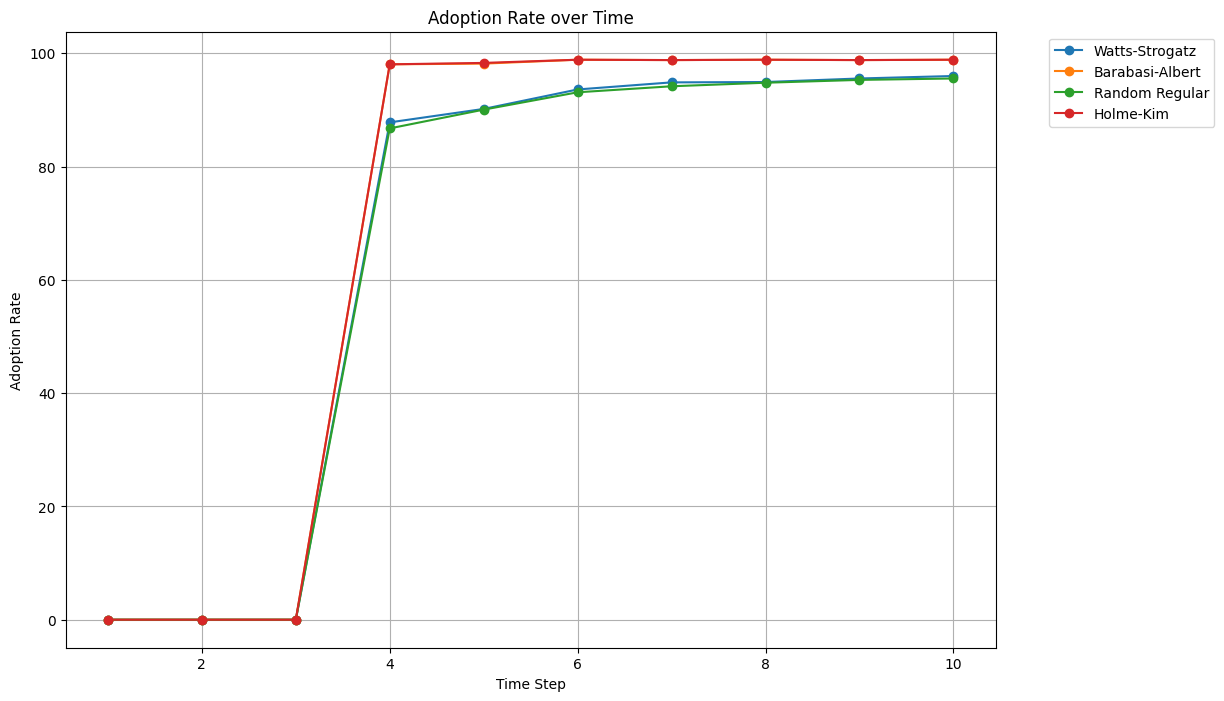

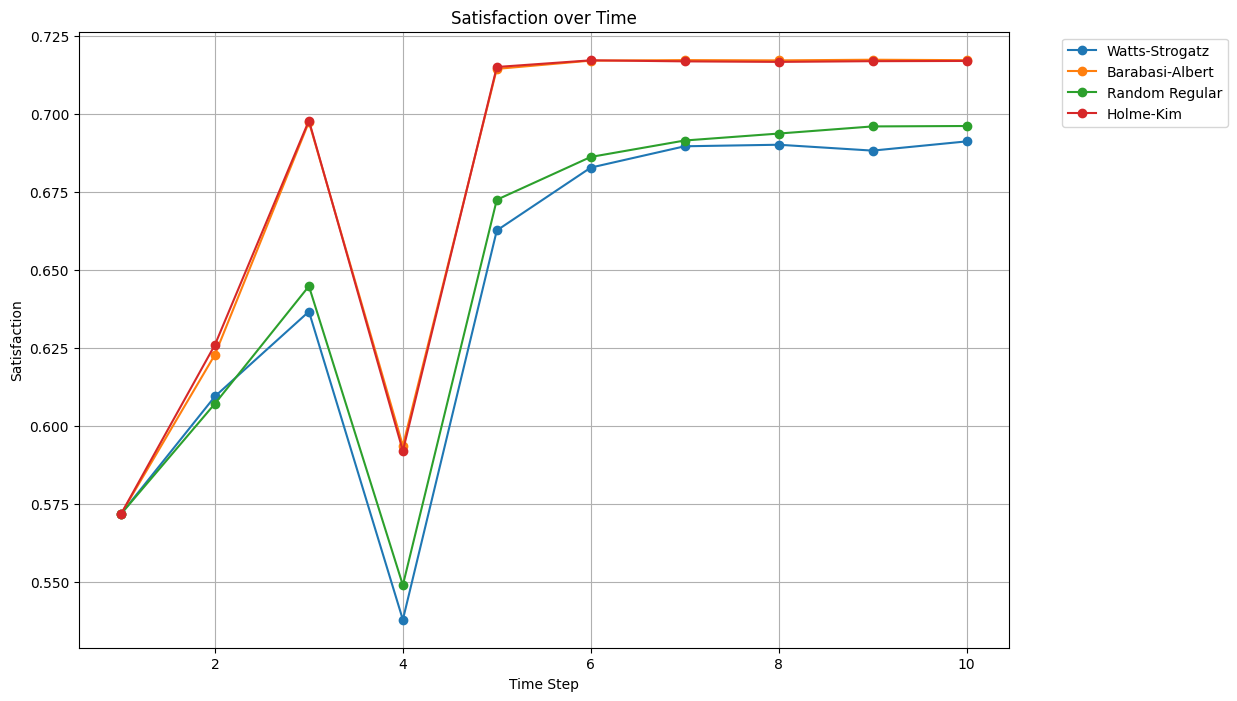

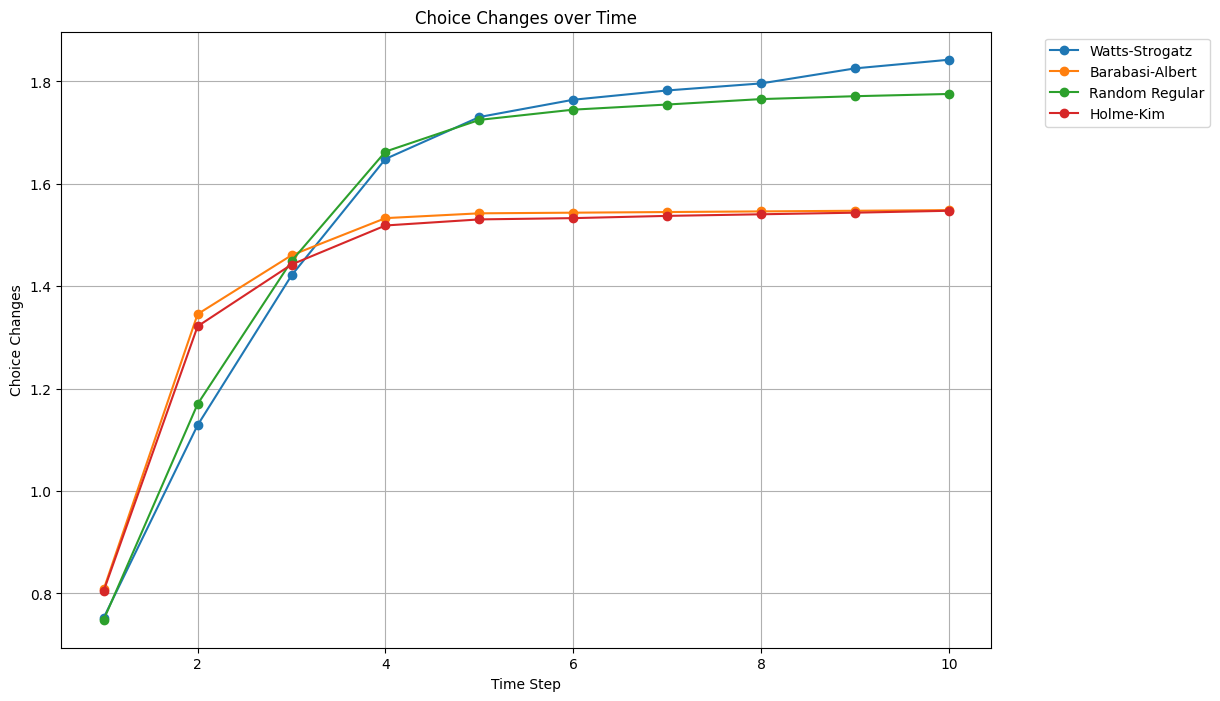

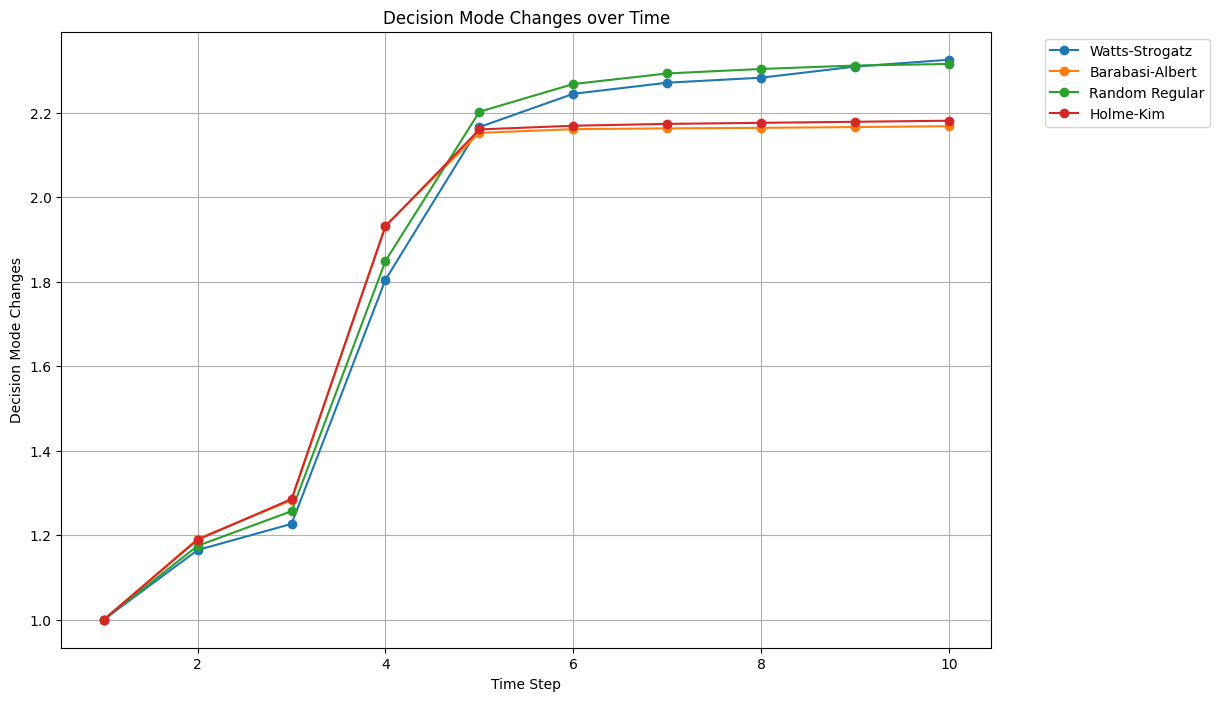

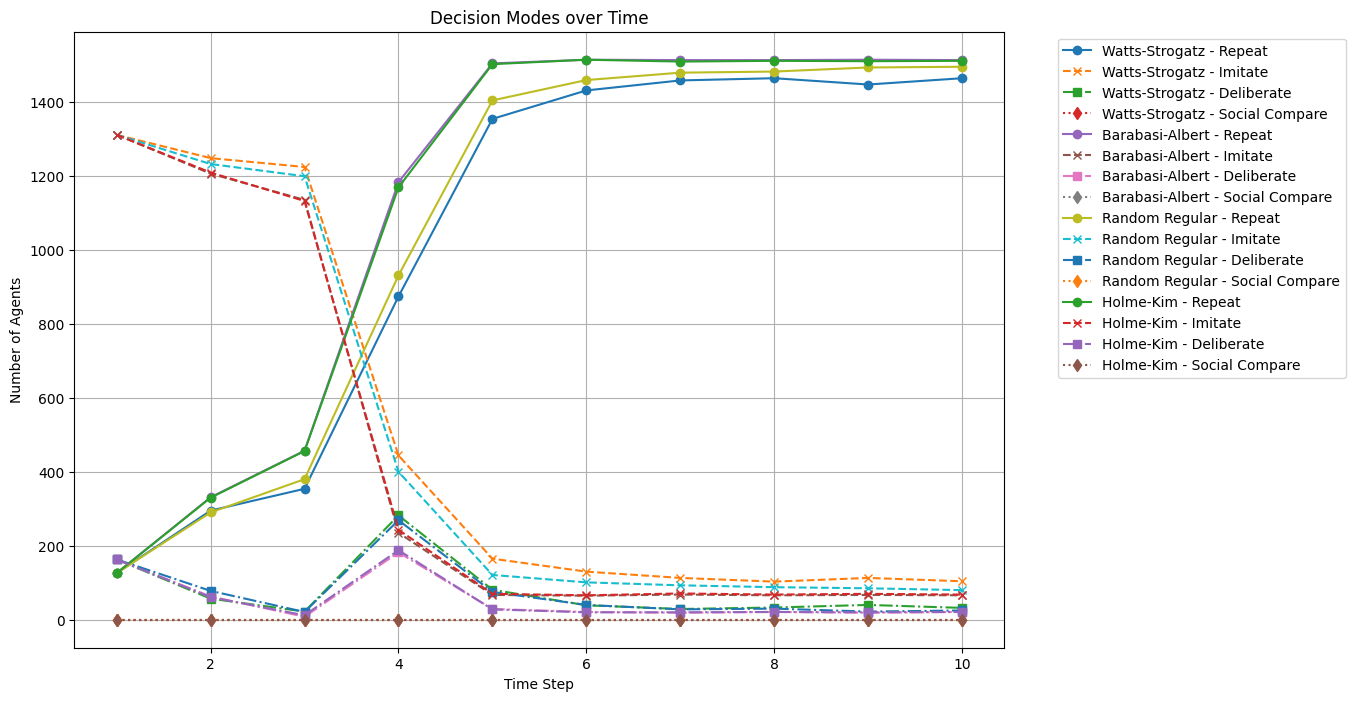

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import random

# Assuming run_simulation is defined elsewhere and imported

def run_simulation_for_networks(config, num_steps):
    results = {
        'Adoption Rate': [],
        'Satisfaction': [],
        'Choice Changes': [],
        'Decision Mode Changes': [],
        'Decision Modes': []
    }

    # Run the simulation
    model = ConsumatModel(config)

    # Debug: Print network properties
    G = model.get_network()
    print(f"Network: {config['network_type']}")
    print(f"Average degree: {np.mean([d for n, d in G.degree()])}")
    print(f"Rewiring probability: {config['network_params'].get('p', 'N/A')}")
    print(f"Clustering coefficient: {nx.average_clustering(G)}")
    if nx.is_connected(G):
        print(f"Average path length: {nx.average_shortest_path_length(G)}")
    else:
        print("Network is not connected")

    # Print the degree distribution
    degrees = [d for n, d in G.degree()]
    print(f"Degree distribution: {np.histogram(degrees, bins=range(max(degrees) + 1))}")

    # Check agent neighbors
    for agent in model.schedule.agents[:5]:  # Check the first 5 agents
        neighbors = model.get_neighbors_for_agent(agent)
        print(f"Agent {agent.unique_id} has {len(neighbors)} neighbors")
    
    # Unpack the results from run_simulation
    model_data, other_data = run_simulation(model, num_steps)
    
    # Extract the metrics from the DataFrame
    adoption_rates = model_data['True_Price_Adoption_Rate'].values
    average_satisfaction = model_data['Average_Satisfaction'].values
    average_choice_changes = model_data['Average_Choice_Changes'].values
    average_decision_mode_changes = model_data['Average_Decision_Mode_Changes'].values
    
    # Store the metrics for this network
    results['Adoption Rate'].append(adoption_rates)
    results['Satisfaction'].append(average_satisfaction)
    results['Choice Changes'].append(average_choice_changes)
    results['Decision Mode Changes'].append(average_decision_mode_changes)
    
    # Collect decision modes count over time
    agent_data = model.datacollector.get_agent_vars_dataframe()
    decision_modes_count = agent_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
    results['Decision Modes'] = decision_modes_count
    
    return results

# Function to run the simulation (assuming it's defined elsewhere)
def run_simulation(model, num_steps):
    for i in range(num_steps):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    other_data = None  # Placeholder for any other data that might be returned
    return model_data, other_data

# Run simulations and collect results for all networks
all_network_results = {}
for network_name, network_config in network_configs.items():
    config = base_config.copy()
    config.update(network_config)
    results = run_simulation_for_networks(config, num_steps)
    all_network_results[network_name] = results

# Plot the results for each metric
metrics = ['Adoption Rate', 'Satisfaction', 'Choice Changes', 'Decision Mode Changes']
for metric in metrics:
    plt.figure(figsize=(12, 8))
    for network_name, results in all_network_results.items():
        plt.plot(range(1, num_steps + 1), results[metric][0], label=f'{network_name}', marker='o')
    plt.title(f'{metric} over Time')
    plt.xlabel('Time Step')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Plot the decision modes count over time for each network
plt.figure(figsize=(12, 8))
for network_name, results in all_network_results.items():
    decision_modes_count = results['Decision Modes']
    plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label=f'{network_name} - Repeat', linestyle='-', marker='o')
    plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label=f'{network_name} - Imitate', linestyle='--', marker='x')
    plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label=f'{network_name} - Deliberate', linestyle='-.', marker='s')
    plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label=f'{network_name} - Social Compare', linestyle=':', marker='d')
plt.title('Decision Modes over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



## Global Sensitivity Analysis

Sobol indices

Saltelli sampling

Pick key parameters (e.g. alpha, beta, rewiring probability) and key measures (true price adoption rate...)

In [18]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1], [2, 10], [0, 1]]  # Define bounds for k and p
    },
    'Barabasi-Albert': {
        'num_vars': 4,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1, 10]]  # Define bounds for m
    },
    'Random Regular': {
        'num_vars': 4,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'd'],
        'bounds': [[0, 1], [0, 1], [0, 1], [2, 10]]  # Define bounds for d
    },
    'Holme-Kim': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'm', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1, 10], [0, 1]]  # Define bounds for m and p
    }
}

In [19]:
# Number of samples
num_samples = 4

# Generate samples for each network problem
samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)


/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_80629/3267385317.py:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  samples[network_name] = saltelli.sample(problem, num_samples)


In [20]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
import json

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[3])
        config['network_params']['p'] = params[4]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[3])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[3])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[3])
        config['network_params']['p'] = params[4]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

num_steps = 10

# Run GSA for each network
for network_name, config in network_configurations.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], num_steps)
    
    results = {}
    
    # Perform Sobol sensitivity analysis
    for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
        Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True)
        results[output] = {
            'S1': Si['S1'].tolist(),
            'ST': Si['ST'].tolist(),
            'S2': Si['S2'].tolist()
        }
        print(f'Sensitivity analysis for {output} ({network_name} network):')
        print(Si)
    
    # Save results to a JSON file
    with open(f'sensitivity_results_{network_name}.json', 'w') as f:
        json.dump(results, f)


Running GSA for Watts-Strogatz network...


Traceback (most recent call last):
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 153, in <module>
    import argparse
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/argparse.py", line 92, in <module>
    from gettext import gettext as _, ngettext
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/gettext.py", line 73, in <module>
    _token_pattern = re.compile(r"""
  File "/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/re.py", line 252, in compile
    return _compile(pattern, flags)
  File "/Users/isabelklennert/opt/anaconda3/envs/

KeyboardInterrupt: 

PAWN

In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import ks_2samp
from joblib import Parallel, delayed

# Base configuration
base_config = {
    'TP_percentage': 0.6,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1600,
    'seed': 42  # Seed for reproducibility
}

# Network configurations
network_configs = {
    'Watts-Strogatz': {
        'network_type': 'watts_strogatz',
        'network_params': {
            'n': 1600,
            'k': 8,
            'p': 0.3
        }
    },
    'Barabasi-Albert': {
        'network_type': 'barabasi_albert',
        'network_params': {
            'n': 1600,
            'm': 8
        }
    },
    'Random Regular': {
        'network_type': 'random_regular',
        'network_params': {
            'n': 1600,
            'd': 8
        }
    },
    'Holme-Kim': {
        'network_type': 'holme_kim',
        'network_params': {
            'n': 1600,
            'm': 8,
            'p': 0.3
        }
    }
}

# Define the parameter bounds for each network type
network_bounds = {
    'Watts-Strogatz': [[0, 1], [0, 1], [0, 1], [2, 20], [0, 1]],
    'Barabasi-Albert': [[0, 1], [0, 1], [0, 1], [2, 20]],
    'Random Regular': [[0, 1], [0, 1], [0, 1], [2, 20]],
    'Holme-Kim': [[0, 1], [0, 1], [0, 1], [2, 20], [0, 1]]
}

# Parameter names for each network type
network_params = {
    'Watts-Strogatz': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'k', 'p'],
    'Barabasi-Albert': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'm'],
    'Random Regular': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'd'],
    'Holme-Kim': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'm', 'p']
}

# Define the number of samples
num_samples = 2560
num_steps = 10

# Generate samples using Latin Hypercube Sampling (LHS)
param_values = {}
for network_name in network_configs.keys():
    param_values[network_name] = np.random.rand(num_samples, len(network_bounds[network_name]))
    for i, bounds in enumerate(network_bounds[network_name]):
        param_values[network_name][:, i] = param_values[network_name][:, i] * (bounds[1] - bounds[0]) + bounds[0]

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[3])
        config['network_params']['p'] = params[4]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[3])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[3])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[3])
        config['network_params']['p'] = params[4]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]
    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name}')
    )
    return np.array(all_results)

# Run GSA for each network
for network_name, config in network_configs.items():
    print(f"Running GSA for {network_name} network...")
    config = base_config.copy()
    config.update(network_configs[network_name])
    samples = param_values[network_name]
    all_results = run_gsa_simulation_parallel(network_name, config, samples, num_steps)
    
    results_df = pd.DataFrame(all_results, columns=[
        'Adoption Rate',
        'Avg_F_Satisfaction',
        'Avg_S_Satisfaction',
        'Avg_P_Satisfaction',
        'Avg_F_Uncertainty',
        'Avg_S_Uncertainty',
        'Avg_P_Uncertainty'
    ])
    results_df.to_csv(f'sensitivity_analysis_results_{network_name}.csv', index=False)

    def pawn_sensitivity(param_values, outputs, num_intervals=10):
        sensitivity_indices = {}
        
        for i, param in enumerate(network_params[network_name]):
            param_column = param_values[:, i]
            sorted_indices = np.argsort(param_column)
            sorted_outputs = outputs[sorted_indices]
            sorted_param_values = param_column[sorted_indices]
            
            interval_size = len(sorted_param_values) // num_intervals
            conditional_distributions = []
            
            for j in range(num_intervals):
                interval_outputs = sorted_outputs[j*interval_size:(j+1)*interval_size]
                conditional_distributions.append(interval_outputs)
            
            ks_statistics = []
            for j in range(num_intervals):
                for k in range(j + 1, num_intervals):
                    ks_statistic, _ = ks_2samp(conditional_distributions[j], conditional_distributions[k])
                    ks_statistics.append(ks_statistic)
            
            sensitivity_index = np.mean(ks_statistics)
            sensitivity_indices[param] = sensitivity_index
        
        return sensitivity_indices

    # Compute PAWN sensitivity indices
    output_metrics = [
        'Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction',
        'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty',
        'Avg_P_Uncertainty'
    ]

    sensitivity_results = {}
    for i, output in enumerate(output_metrics):
        sensitivity_indices = pawn_sensitivity(samples, all_results[:, i])
        sensitivity_results[output] = sensitivity_indices
        print(f'PAWN Sensitivity Indices for {output} ({network_name} network):')
        for param, sensitivity in sensitivity_indices.items():
            print(f'  {param}: {sensitivity}')

    # Save sensitivity analysis results
    sensitivity_df = pd.DataFrame(sensitivity_results).T
    sensitivity_df.to_csv(f'pawn_sensitivity_indices_{network_name}.csv', index=True)


Running GSA for Watts-Strogatz network...


Running simulations for Watts-Strogatz:   0%|          | 10/2560 [00:00<02:48, 15.11it/s]

KeyboardInterrupt: 